# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

/home/runner/work/river/river/.venv/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
  0%|          | 11846/6000000 [00:00<00:50, 118449.10it/s]

  0%|          | 23691/6000000 [00:00<00:51, 116775.99it/s]

  1%|          | 35371/6000000 [00:00<00:51, 116314.49it/s]

  1%|          | 47004/6000000 [00:00<00:51, 116307.24it/s]

  1%|          | 58645/6000000 [00:00<00:51, 116343.37it/s]

  1%|          | 70544/6000000 [00:00<00:50, 117238.02it/s]

  1%|▏         | 82269/6000000 [00:00<00:50, 116991.63it/s]

  2%|▏         | 93969/6000000 [00:00<00:50, 116905.94it/s]

  2%|▏         | 105660/6000000 [00:00<00:51, 114837.59it/s]

  2%|▏         | 117152/6000000 [00:01<00:52, 112718.09it/s]

  2%|▏         | 129001/6000000 [00:01<00:51, 114173.68it/s]

  2%|▏         | 140967/6000000 [00:01<00:50, 115810.35it/s]

  3%|▎         | 152630/6000000 [00:01<00:50, 116054.80it/s]

  3%|▎         | 164243/6000000 [00:01<00:50, 115908.95it/s]

  3%|▎         | 175839/6000000 [00:01<00:50, 115856.06it/s]

  3%|▎         | 187429/6000000 [00:01<00:50, 115825.18it/s]

  3%|▎         | 199296/6000000 [00:01<00:49, 116675.63it/s]

  4%|▎         | 210983/6000000 [00:01<00:49, 116731.65it/s]

  4%|▎         | 222683/6000000 [00:01<00:49, 116811.54it/s]

  4%|▍         | 234366/6000000 [00:02<00:49, 116392.12it/s]

  4%|▍         | 246007/6000000 [00:02<00:49, 116074.01it/s]

  4%|▍         | 258001/6000000 [00:02<00:49, 116626.58it/s]

  4%|▍         | 269925/6000000 [00:02<00:48, 117404.61it/s]

  5%|▍         | 281667/6000000 [00:02<00:48, 117101.48it/s]

  5%|▍         | 293378/6000000 [00:02<00:49, 116404.12it/s]

  5%|▌         | 305127/6000000 [00:02<00:48, 116725.17it/s]

  5%|▌         | 316801/6000000 [00:02<00:48, 116631.81it/s]

  5%|▌         | 328465/6000000 [00:02<00:48, 116117.80it/s]

  6%|▌         | 340078/6000000 [00:02<00:48, 115964.19it/s]

  6%|▌         | 351675/6000000 [00:03<00:48, 115794.35it/s]

  6%|▌         | 363413/6000000 [00:03<00:48, 116265.10it/s]

  6%|▋         | 375097/6000000 [00:03<00:48, 116436.44it/s]

  6%|▋         | 386939/6000000 [00:03<00:47, 117027.65it/s]

  7%|▋         | 398643/6000000 [00:03<00:47, 116874.73it/s]

  7%|▋         | 410331/6000000 [00:03<00:48, 116006.03it/s]

  7%|▋         | 421934/6000000 [00:03<00:48, 115930.02it/s]

  7%|▋         | 433529/6000000 [00:03<00:48, 115831.01it/s]

  7%|▋         | 445113/6000000 [00:03<00:47, 115790.35it/s]

  8%|▊         | 456693/6000000 [00:03<00:47, 115752.67it/s]

  8%|▊         | 468269/6000000 [00:04<00:47, 115605.44it/s]

  8%|▊         | 480087/6000000 [00:04<00:47, 116373.70it/s]

  8%|▊         | 491992/6000000 [00:04<00:47, 117174.36it/s]

  8%|▊         | 503765/6000000 [00:04<00:46, 117338.18it/s]

  9%|▊         | 515500/6000000 [00:04<00:46, 117071.46it/s]

  9%|▉         | 527208/6000000 [00:04<00:46, 116577.97it/s]

  9%|▉         | 539000/6000000 [00:04<00:46, 116977.36it/s]

  9%|▉         | 550699/6000000 [00:04<00:46, 116828.83it/s]

  9%|▉         | 562459/6000000 [00:04<00:46, 117058.15it/s]

 10%|▉         | 574166/6000000 [00:04<00:46, 116572.38it/s]

 10%|▉         | 585870/6000000 [00:05<00:46, 116710.33it/s]

 10%|▉         | 597542/6000000 [00:05<00:46, 116385.63it/s]

 10%|█         | 609203/6000000 [00:05<00:46, 116446.14it/s]

 10%|█         | 621001/6000000 [00:05<00:46, 116583.47it/s]

 11%|█         | 633001/6000000 [00:05<00:45, 116994.93it/s]

 11%|█         | 644747/6000000 [00:05<00:45, 117130.59it/s]

 11%|█         | 656461/6000000 [00:05<00:45, 116882.10it/s]

 11%|█         | 668154/6000000 [00:05<00:45, 116894.03it/s]

 11%|█▏        | 679914/6000000 [00:05<00:45, 117102.57it/s]

 12%|█▏        | 691625/6000000 [00:05<00:45, 117033.84it/s]

 12%|█▏        | 703329/6000000 [00:06<00:45, 116815.92it/s]

 12%|█▏        | 715038/6000000 [00:06<00:45, 116895.53it/s]

 12%|█▏        | 726728/6000000 [00:06<00:45, 116848.11it/s]

 12%|█▏        | 738413/6000000 [00:06<00:45, 116369.74it/s]

 13%|█▎        | 750118/6000000 [00:06<00:45, 116569.54it/s]

 13%|█▎        | 762002/6000000 [00:06<00:44, 117200.38it/s]

 13%|█▎        | 773953/6000000 [00:06<00:44, 117888.86it/s]

 13%|█▎        | 785743/6000000 [00:06<00:44, 117247.03it/s]

 13%|█▎        | 797469/6000000 [00:06<00:52, 98495.36it/s] 

 13%|█▎        | 809097/6000000 [00:07<00:50, 103184.61it/s]

 14%|█▎        | 820635/6000000 [00:07<00:48, 106521.20it/s]

 14%|█▍        | 832203/6000000 [00:07<00:47, 109094.28it/s]

 14%|█▍        | 844085/6000000 [00:07<00:46, 111880.16it/s]

 14%|█▍        | 855653/6000000 [00:07<00:45, 112983.16it/s]

 14%|█▍        | 867453/6000000 [00:07<00:44, 114452.80it/s]

 15%|█▍        | 879182/6000000 [00:07<00:44, 115287.67it/s]

 15%|█▍        | 891001/6000000 [00:07<00:44, 115923.09it/s]

 15%|█▌        | 902965/6000000 [00:07<00:43, 117026.41it/s]

 15%|█▌        | 914703/6000000 [00:07<00:43, 116826.49it/s]

 15%|█▌        | 926452/6000000 [00:08<00:43, 117022.73it/s]

 16%|█▌        | 938237/6000000 [00:08<00:43, 117268.74it/s]

 16%|█▌        | 949977/6000000 [00:08<00:43, 117271.91it/s]

 16%|█▌        | 961713/6000000 [00:08<00:43, 116861.38it/s]

 16%|█▌        | 973535/6000000 [00:08<00:42, 117264.90it/s]

 16%|█▋        | 985267/6000000 [00:08<00:42, 116715.30it/s]

 17%|█▋        | 996943/6000000 [00:08<00:43, 115960.32it/s]

 17%|█▋        | 1008543/6000000 [00:08<00:43, 115600.36it/s]

 17%|█▋        | 1020157/6000000 [00:08<00:43, 115758.82it/s]

 17%|█▋        | 1032001/6000000 [00:08<00:42, 116278.51it/s]

 17%|█▋        | 1043631/6000000 [00:09<00:43, 114995.59it/s]

 18%|█▊        | 1055233/6000000 [00:09<00:42, 115298.92it/s]

 18%|█▊        | 1066766/6000000 [00:09<00:42, 115127.39it/s]

 18%|█▊        | 1078447/6000000 [00:09<00:42, 115627.90it/s]

 18%|█▊        | 1090167/6000000 [00:09<00:42, 116094.47it/s]

 18%|█▊        | 1101936/6000000 [00:09<00:42, 116570.37it/s]

 19%|█▊        | 1113595/6000000 [00:09<00:42, 116293.56it/s]

 19%|█▉        | 1125226/6000000 [00:09<00:42, 115909.02it/s]

 19%|█▉        | 1137001/6000000 [00:09<00:41, 116386.00it/s]

 19%|█▉        | 1148641/6000000 [00:09<00:41, 116261.80it/s]

 19%|█▉        | 1160268/6000000 [00:10<00:41, 115737.19it/s]

 20%|█▉        | 1171843/6000000 [00:10<00:41, 115693.64it/s]

 20%|█▉        | 1183413/6000000 [00:10<00:41, 115639.98it/s]

 20%|█▉        | 1195062/6000000 [00:10<00:41, 115893.44it/s]

 20%|██        | 1206671/6000000 [00:10<00:41, 115949.25it/s]

 20%|██        | 1218400/6000000 [00:10<00:41, 116349.77it/s]

 21%|██        | 1230036/6000000 [00:10<00:40, 116348.05it/s]

 21%|██        | 1241904/6000000 [00:10<00:40, 117044.49it/s]

 21%|██        | 1253609/6000000 [00:10<00:40, 116903.70it/s]

 21%|██        | 1265300/6000000 [00:10<00:40, 116285.18it/s]

 21%|██▏       | 1276930/6000000 [00:11<00:41, 114580.93it/s]

 21%|██▏       | 1288439/6000000 [00:11<00:41, 114728.86it/s]

 22%|██▏       | 1300108/6000000 [00:11<00:40, 115308.60it/s]

 22%|██▏       | 1311643/6000000 [00:11<00:40, 115318.84it/s]

 22%|██▏       | 1323231/6000000 [00:11<00:40, 115485.36it/s]

 22%|██▏       | 1335001/6000000 [00:11<00:40, 115781.85it/s]

 22%|██▏       | 1346944/6000000 [00:11<00:39, 116869.05it/s]

 23%|██▎       | 1358633/6000000 [00:11<00:39, 116406.92it/s]

 23%|██▎       | 1370388/6000000 [00:11<00:39, 116746.82it/s]

 23%|██▎       | 1382121/6000000 [00:11<00:39, 116920.02it/s]

 23%|██▎       | 1393901/6000000 [00:12<00:39, 117181.72it/s]

 23%|██▎       | 1405620/6000000 [00:12<00:39, 116435.52it/s]

 24%|██▎       | 1417265/6000000 [00:12<00:39, 116210.53it/s]

 24%|██▍       | 1428946/6000000 [00:12<00:39, 116387.45it/s]

 24%|██▍       | 1440586/6000000 [00:12<00:39, 116028.94it/s]

 24%|██▍       | 1452229/6000000 [00:12<00:39, 116148.38it/s]

 24%|██▍       | 1464005/6000000 [00:12<00:38, 116628.19it/s]

 25%|██▍       | 1475948/6000000 [00:12<00:38, 117464.50it/s]

 25%|██▍       | 1487696/6000000 [00:12<00:38, 116888.93it/s]

 25%|██▍       | 1499386/6000000 [00:12<00:38, 116365.79it/s]

 25%|██▌       | 1511024/6000000 [00:13<00:39, 113696.58it/s]

 25%|██▌       | 1522774/6000000 [00:13<00:38, 114813.60it/s]

 26%|██▌       | 1534529/6000000 [00:13<00:38, 115621.23it/s]

 26%|██▌       | 1546140/6000000 [00:13<00:38, 115765.90it/s]

 26%|██▌       | 1557841/6000000 [00:13<00:38, 116134.67it/s]

 26%|██▌       | 1569498/6000000 [00:13<00:38, 116261.99it/s]

 26%|██▋       | 1581336/6000000 [00:13<00:37, 116893.83it/s]

 27%|██▋       | 1593029/6000000 [00:13<00:38, 115518.57it/s]

 27%|██▋       | 1604881/6000000 [00:13<00:37, 116408.97it/s]

 27%|██▋       | 1616527/6000000 [00:13<00:37, 116185.41it/s]

 27%|██▋       | 1628149/6000000 [00:14<00:37, 115493.98it/s]

 27%|██▋       | 1639702/6000000 [00:14<00:37, 115355.46it/s]

 28%|██▊       | 1651317/6000000 [00:14<00:37, 115590.13it/s]

 28%|██▊       | 1663028/6000000 [00:14<00:37, 116043.46it/s]

 28%|██▊       | 1674706/6000000 [00:14<00:37, 116261.87it/s]

 28%|██▊       | 1686370/6000000 [00:14<00:37, 116373.74it/s]

 28%|██▊       | 1698071/6000000 [00:14<00:36, 116562.66it/s]

 28%|██▊       | 1709874/6000000 [00:14<00:36, 117001.52it/s]

 29%|██▊       | 1721575/6000000 [00:14<00:36, 116836.69it/s]

 29%|██▉       | 1733292/6000000 [00:14<00:36, 116933.72it/s]

 29%|██▉       | 1744986/6000000 [00:15<00:36, 115473.74it/s]

 29%|██▉       | 1756561/6000000 [00:15<00:36, 115553.24it/s]

 29%|██▉       | 1768120/6000000 [00:15<00:36, 114615.44it/s]

 30%|██▉       | 1779608/6000000 [00:15<00:36, 114691.41it/s]

 30%|██▉       | 1791469/6000000 [00:15<00:36, 115855.81it/s]

 30%|███       | 1803058/6000000 [00:15<00:36, 115455.53it/s]

 30%|███       | 1814728/6000000 [00:15<00:36, 115825.88it/s]

 30%|███       | 1826397/6000000 [00:15<00:35, 116082.80it/s]

 31%|███       | 1838007/6000000 [00:15<00:35, 115969.72it/s]

 31%|███       | 1849605/6000000 [00:15<00:35, 115750.91it/s]

 31%|███       | 1861181/6000000 [00:16<00:35, 115108.19it/s]

 31%|███       | 1872693/6000000 [00:16<00:36, 114137.14it/s]

 31%|███▏      | 1884120/6000000 [00:16<00:36, 114175.81it/s]

 32%|███▏      | 1896001/6000000 [00:16<00:35, 115164.50it/s]

 32%|███▏      | 1907724/6000000 [00:16<00:35, 115777.85it/s]

 32%|███▏      | 1919303/6000000 [00:16<00:35, 115529.81it/s]

 32%|███▏      | 1930942/6000000 [00:16<00:35, 115785.90it/s]

 32%|███▏      | 1942558/6000000 [00:16<00:35, 115895.69it/s]

 33%|███▎      | 1954304/6000000 [00:16<00:34, 116362.90it/s]

 33%|███▎      | 1965941/6000000 [00:16<00:34, 116143.74it/s]

 33%|███▎      | 1977556/6000000 [00:17<00:34, 116036.95it/s]

 33%|███▎      | 1989218/6000000 [00:17<00:34, 116209.98it/s]

 33%|███▎      | 2001001/6000000 [00:17<00:34, 116208.94it/s]

 34%|███▎      | 2012822/6000000 [00:17<00:34, 116800.82it/s]

 34%|███▎      | 2024503/6000000 [00:17<00:34, 116114.88it/s]

 34%|███▍      | 2036116/6000000 [00:17<00:34, 115563.54it/s]

 34%|███▍      | 2047868/6000000 [00:17<00:34, 116144.68it/s]

 34%|███▍      | 2059484/6000000 [00:17<00:34, 115713.74it/s]

 35%|███▍      | 2071057/6000000 [00:17<00:34, 115079.15it/s]

 35%|███▍      | 2082566/6000000 [00:17<00:34, 114744.26it/s]

 35%|███▍      | 2094257/6000000 [00:18<00:33, 115384.20it/s]

 35%|███▌      | 2105797/6000000 [00:18<00:34, 113852.13it/s]

 35%|███▌      | 2117361/6000000 [00:18<00:33, 114380.45it/s]

 35%|███▌      | 2128885/6000000 [00:18<00:33, 114635.29it/s]

 36%|███▌      | 2140352/6000000 [00:18<00:33, 114354.12it/s]

 36%|███▌      | 2151851/6000000 [00:18<00:33, 114540.53it/s]

 36%|███▌      | 2163381/6000000 [00:18<00:33, 114764.27it/s]

 36%|███▋      | 2175001/6000000 [00:18<00:33, 114915.41it/s]

 36%|███▋      | 2186900/6000000 [00:18<00:32, 116131.23it/s]

 37%|███▋      | 2198543/6000000 [00:18<00:32, 116219.98it/s]

 37%|███▋      | 2210166/6000000 [00:19<00:32, 116002.24it/s]

 37%|███▋      | 2221767/6000000 [00:19<00:32, 115993.59it/s]

 37%|███▋      | 2233558/6000000 [00:19<00:32, 116566.51it/s]

 37%|███▋      | 2245216/6000000 [00:19<00:32, 116459.62it/s]

 38%|███▊      | 2257061/6000000 [00:19<00:31, 117052.45it/s]

 38%|███▊      | 2268767/6000000 [00:19<00:31, 116736.99it/s]

 38%|███▊      | 2280616/6000000 [00:19<00:31, 117258.24it/s]

 38%|███▊      | 2292452/6000000 [00:19<00:31, 117585.15it/s]

 38%|███▊      | 2304388/6000000 [00:19<00:31, 118114.63it/s]

 39%|███▊      | 2316200/6000000 [00:19<00:31, 117307.21it/s]

 39%|███▉      | 2328001/6000000 [00:20<00:31, 116814.45it/s]

 39%|███▉      | 2339684/6000000 [00:20<00:31, 116619.28it/s]

 39%|███▉      | 2351577/6000000 [00:20<00:31, 117302.97it/s]

 39%|███▉      | 2363309/6000000 [00:20<00:31, 116909.47it/s]

 40%|███▉      | 2375001/6000000 [00:20<00:31, 116809.31it/s]

 40%|███▉      | 2386683/6000000 [00:20<00:31, 116325.99it/s]

 40%|███▉      | 2398406/6000000 [00:20<00:30, 116594.64it/s]

 40%|████      | 2410067/6000000 [00:20<00:30, 116421.59it/s]

 40%|████      | 2421710/6000000 [00:20<00:30, 115963.54it/s]

 41%|████      | 2433312/6000000 [00:21<00:30, 115978.68it/s]

 41%|████      | 2445181/6000000 [00:21<00:30, 116785.89it/s]

 41%|████      | 2456861/6000000 [00:21<00:30, 114705.11it/s]

 41%|████      | 2468340/6000000 [00:21<00:30, 114308.20it/s]

 41%|████▏     | 2480099/6000000 [00:21<00:30, 115279.31it/s]

 42%|████▏     | 2491696/6000000 [00:21<00:30, 115484.20it/s]

 42%|████▏     | 2503280/6000000 [00:21<00:30, 115588.49it/s]

 42%|████▏     | 2514917/6000000 [00:21<00:30, 115820.21it/s]

 42%|████▏     | 2526741/6000000 [00:21<00:29, 116541.84it/s]

 42%|████▏     | 2538397/6000000 [00:21<00:29, 116399.61it/s]

 43%|████▎     | 2550039/6000000 [00:22<00:29, 116081.15it/s]

 43%|████▎     | 2562001/6000000 [00:22<00:29, 117108.25it/s]

 43%|████▎     | 2573713/6000000 [00:22<00:29, 116202.20it/s]

 43%|████▎     | 2585336/6000000 [00:22<00:29, 116037.75it/s]

 43%|████▎     | 2596960/6000000 [00:22<00:29, 116097.34it/s]

 43%|████▎     | 2608642/6000000 [00:22<00:29, 116312.81it/s]

 44%|████▎     | 2620275/6000000 [00:22<00:29, 116294.27it/s]

 44%|████▍     | 2631905/6000000 [00:22<00:29, 116096.10it/s]

 44%|████▍     | 2643559/6000000 [00:22<00:28, 116225.95it/s]

 44%|████▍     | 2655213/6000000 [00:22<00:28, 116318.10it/s]

 44%|████▍     | 2667001/6000000 [00:23<00:28, 116474.24it/s]

 45%|████▍     | 2678880/6000000 [00:23<00:28, 117165.85it/s]

 45%|████▍     | 2690597/6000000 [00:23<00:29, 114015.03it/s]

 45%|████▌     | 2702165/6000000 [00:23<00:28, 114503.17it/s]

 45%|████▌     | 2713647/6000000 [00:23<00:28, 114595.43it/s]

 45%|████▌     | 2725321/6000000 [00:23<00:28, 115232.01it/s]

 46%|████▌     | 2736924/6000000 [00:23<00:28, 115467.77it/s]

 46%|████▌     | 2748522/6000000 [00:23<00:28, 115618.49it/s]

 46%|████▌     | 2760088/6000000 [00:23<00:28, 115237.91it/s]

 46%|████▌     | 2771907/6000000 [00:23<00:27, 116117.30it/s]

 46%|████▋     | 2783531/6000000 [00:24<00:27, 116152.20it/s]

 47%|████▋     | 2795202/6000000 [00:24<00:27, 116318.34it/s]

 47%|████▋     | 2806836/6000000 [00:24<00:28, 113185.79it/s]

 47%|████▋     | 2818542/6000000 [00:24<00:27, 114323.56it/s]

 47%|████▋     | 2830207/6000000 [00:24<00:27, 115009.23it/s]

 47%|████▋     | 2841836/6000000 [00:24<00:27, 115386.87it/s]

 48%|████▊     | 2853413/6000000 [00:24<00:27, 115498.48it/s]

 48%|████▊     | 2865002/6000000 [00:24<00:27, 115571.63it/s]

 48%|████▊     | 2876846/6000000 [00:24<00:26, 116426.96it/s]

 48%|████▊     | 2888640/6000000 [00:24<00:26, 116879.21it/s]

 48%|████▊     | 2900393/6000000 [00:25<00:26, 117072.20it/s]

 49%|████▊     | 2912102/6000000 [00:25<00:26, 116467.82it/s]

 49%|████▊     | 2923861/6000000 [00:25<00:26, 116801.81it/s]

 49%|████▉     | 2935543/6000000 [00:25<00:26, 116160.31it/s]

 49%|████▉     | 2947193/6000000 [00:25<00:26, 116258.73it/s]

 49%|████▉     | 2958948/6000000 [00:25<00:26, 116643.48it/s]

 50%|████▉     | 2970614/6000000 [00:25<00:26, 116112.50it/s]

 50%|████▉     | 2982227/6000000 [00:25<00:26, 115995.04it/s]

 50%|████▉     | 2994000/6000000 [00:25<00:25, 116510.82it/s]

 50%|█████     | 3005759/6000000 [00:25<00:25, 116832.42it/s]

 50%|█████     | 3017452/6000000 [00:26<00:25, 116858.83it/s]

 50%|█████     | 3029139/6000000 [00:26<00:25, 116340.37it/s]

 51%|█████     | 3040774/6000000 [00:26<00:31, 92556.74it/s] 

 51%|█████     | 3052570/6000000 [00:26<00:29, 98994.45it/s]

 51%|█████     | 3064133/6000000 [00:26<00:28, 103414.84it/s]

 51%|█████▏    | 3075788/6000000 [00:26<00:27, 107029.00it/s]

 51%|█████▏    | 3087424/6000000 [00:26<00:26, 109660.93it/s]

 52%|█████▏    | 3099003/6000000 [00:26<00:26, 111395.98it/s]

 52%|█████▏    | 3110876/6000000 [00:26<00:25, 113529.17it/s]

 52%|█████▏    | 3122549/6000000 [00:27<00:25, 114466.53it/s]

 52%|█████▏    | 3134344/6000000 [00:27<00:24, 115494.05it/s]

 52%|█████▏    | 3145973/6000000 [00:27<00:24, 115600.19it/s]

 53%|█████▎    | 3157589/6000000 [00:27<00:24, 114640.44it/s]

 53%|█████▎    | 3169094/6000000 [00:27<00:24, 114730.44it/s]

 53%|█████▎    | 3180596/6000000 [00:27<00:24, 114784.82it/s]

 53%|█████▎    | 3192095/6000000 [00:27<00:24, 114748.41it/s]

 53%|█████▎    | 3203891/6000000 [00:27<00:24, 115705.70it/s]

 54%|█████▎    | 3215472/6000000 [00:27<00:24, 115429.33it/s]

 54%|█████▍    | 3227023/6000000 [00:27<00:24, 115409.41it/s]

 54%|█████▍    | 3238867/6000000 [00:28<00:23, 116314.49it/s]

 54%|█████▍    | 3250503/6000000 [00:28<00:23, 116051.06it/s]

 54%|█████▍    | 3262170/6000000 [00:28<00:23, 116235.33it/s]

 55%|█████▍    | 3273796/6000000 [00:28<00:23, 114007.61it/s]

 55%|█████▍    | 3285427/6000000 [00:28<00:23, 114686.27it/s]

 55%|█████▍    | 3297001/6000000 [00:28<00:23, 114788.11it/s]

 55%|█████▌    | 3308733/6000000 [00:28<00:23, 115539.57it/s]

 55%|█████▌    | 3320292/6000000 [00:28<00:23, 115026.67it/s]

 56%|█████▌    | 3331799/6000000 [00:28<00:23, 114924.00it/s]

 56%|█████▌    | 3343378/6000000 [00:28<00:23, 115179.42it/s]

 56%|█████▌    | 3354898/6000000 [00:29<00:23, 114785.16it/s]

 56%|█████▌    | 3366378/6000000 [00:29<00:22, 114577.53it/s]

 56%|█████▋    | 3378002/6000000 [00:29<00:22, 115062.15it/s]

 56%|█████▋    | 3389510/6000000 [00:29<00:23, 111929.82it/s]

 57%|█████▋    | 3400962/6000000 [00:29<00:23, 112688.82it/s]

 57%|█████▋    | 3412450/6000000 [00:29<00:22, 113332.77it/s]

 57%|█████▋    | 3423885/6000000 [00:29<00:22, 113628.97it/s]

 57%|█████▋    | 3435347/6000000 [00:29<00:22, 113921.94it/s]

 57%|█████▋    | 3447108/6000000 [00:29<00:22, 115021.81it/s]

 58%|█████▊    | 3458766/6000000 [00:29<00:22, 115484.82it/s]

 58%|█████▊    | 3470318/6000000 [00:30<00:22, 114954.81it/s]

 58%|█████▊    | 3481954/6000000 [00:30<00:21, 115372.18it/s]

 58%|█████▊    | 3493655/6000000 [00:30<00:21, 115859.31it/s]

 58%|█████▊    | 3505243/6000000 [00:30<00:21, 115278.48it/s]

 59%|█████▊    | 3517083/6000000 [00:30<00:21, 116207.33it/s]

 59%|█████▉    | 3528817/6000000 [00:30<00:21, 116545.14it/s]

 59%|█████▉    | 3540473/6000000 [00:30<00:21, 115802.17it/s]

 59%|█████▉    | 3552056/6000000 [00:30<00:21, 115521.90it/s]

 59%|█████▉    | 3563948/6000000 [00:30<00:20, 116532.32it/s]

 60%|█████▉    | 3575603/6000000 [00:30<00:20, 116249.13it/s]

 60%|█████▉    | 3587230/6000000 [00:31<00:20, 115685.95it/s]

 60%|█████▉    | 3598800/6000000 [00:31<00:20, 115378.70it/s]

 60%|██████    | 3610339/6000000 [00:31<00:20, 115196.30it/s]

 60%|██████    | 3621860/6000000 [00:31<00:21, 109464.58it/s]

 61%|██████    | 3633065/6000000 [00:31<00:21, 110207.22it/s]

 61%|██████    | 3645001/6000000 [00:31<00:20, 112533.63it/s]

 61%|██████    | 3656854/6000000 [00:31<00:20, 114292.34it/s]

 61%|██████    | 3668312/6000000 [00:31<00:20, 114272.96it/s]

 61%|██████▏   | 3679847/6000000 [00:31<00:20, 114590.79it/s]

 62%|██████▏   | 3691611/6000000 [00:31<00:19, 115496.18it/s]

 62%|██████▏   | 3703172/6000000 [00:32<00:19, 115044.64it/s]

 62%|██████▏   | 3714685/6000000 [00:32<00:19, 114975.86it/s]

 62%|██████▏   | 3726188/6000000 [00:32<00:19, 114984.03it/s]

 62%|██████▏   | 3737691/6000000 [00:32<00:19, 114636.37it/s]

 62%|██████▏   | 3749158/6000000 [00:32<00:19, 114468.50it/s]

 63%|██████▎   | 3760656/6000000 [00:32<00:19, 114620.39it/s]

 63%|██████▎   | 3772394/6000000 [00:32<00:19, 115445.11it/s]

 63%|██████▎   | 3783940/6000000 [00:32<00:19, 115280.20it/s]

 63%|██████▎   | 3795634/6000000 [00:32<00:19, 115774.08it/s]

 63%|██████▎   | 3807213/6000000 [00:32<00:18, 115479.27it/s]

 64%|██████▎   | 3818887/6000000 [00:33<00:18, 115853.38it/s]

 64%|██████▍   | 3830473/6000000 [00:33<00:18, 115762.28it/s]

 64%|██████▍   | 3842050/6000000 [00:33<00:18, 114288.53it/s]

 64%|██████▍   | 3853484/6000000 [00:33<00:19, 110945.60it/s]

 64%|██████▍   | 3864973/6000000 [00:33<00:19, 112091.95it/s]

 65%|██████▍   | 3876351/6000000 [00:33<00:18, 112585.62it/s]

 65%|██████▍   | 3888001/6000000 [00:33<00:18, 113346.13it/s]

 65%|██████▍   | 3899749/6000000 [00:33<00:18, 114568.64it/s]

 65%|██████▌   | 3911261/6000000 [00:33<00:18, 114731.52it/s]

 65%|██████▌   | 3922792/6000000 [00:34<00:18, 114903.15it/s]

 66%|██████▌   | 3934287/6000000 [00:34<00:18, 114760.57it/s]

 66%|██████▌   | 3945767/6000000 [00:34<00:17, 114447.95it/s]

 66%|██████▌   | 3957387/6000000 [00:34<00:17, 114968.57it/s]

 66%|██████▌   | 3969001/6000000 [00:34<00:17, 115182.48it/s]

 66%|██████▋   | 3980794/6000000 [00:34<00:17, 116003.25it/s]

 67%|██████▋   | 3992521/6000000 [00:34<00:17, 116381.88it/s]

 67%|██████▋   | 4004161/6000000 [00:34<00:17, 115982.32it/s]

 67%|██████▋   | 4015801/6000000 [00:34<00:17, 116105.89it/s]

 67%|██████▋   | 4027413/6000000 [00:34<00:17, 116032.32it/s]

 67%|██████▋   | 4039069/6000000 [00:35<00:16, 116188.65it/s]

 68%|██████▊   | 4050689/6000000 [00:35<00:16, 115860.54it/s]

 68%|██████▊   | 4062356/6000000 [00:35<00:16, 116099.60it/s]

 68%|██████▊   | 4074002/6000000 [00:35<00:16, 116166.31it/s]

 68%|██████▊   | 4085619/6000000 [00:35<00:17, 111571.52it/s]

 68%|██████▊   | 4097067/6000000 [00:35<00:16, 112418.10it/s]

 68%|██████▊   | 4108851/6000000 [00:35<00:16, 114009.98it/s]

 69%|██████▊   | 4120406/6000000 [00:35<00:16, 114463.60it/s]

 69%|██████▉   | 4131987/6000000 [00:35<00:16, 114862.36it/s]

 69%|██████▉   | 4143849/6000000 [00:35<00:16, 115980.83it/s]

 69%|██████▉   | 4155570/6000000 [00:36<00:15, 116346.01it/s]

 69%|██████▉   | 4167212/6000000 [00:36<00:15, 116181.11it/s]

 70%|██████▉   | 4178911/6000000 [00:36<00:15, 116421.35it/s]

 70%|██████▉   | 4190557/6000000 [00:36<00:15, 116084.86it/s]

 70%|███████   | 4202169/6000000 [00:36<00:15, 116001.09it/s]

 70%|███████   | 4213907/6000000 [00:36<00:15, 116412.94it/s]

 70%|███████   | 4225693/6000000 [00:36<00:15, 116843.18it/s]

 71%|███████   | 4237379/6000000 [00:36<00:15, 116309.96it/s]

 71%|███████   | 4249012/6000000 [00:36<00:15, 115813.63it/s]

 71%|███████   | 4260669/6000000 [00:36<00:14, 116037.71it/s]

 71%|███████   | 4272291/6000000 [00:37<00:14, 116090.21it/s]

 71%|███████▏  | 4284002/6000000 [00:37<00:14, 116387.54it/s]

 72%|███████▏  | 4295946/6000000 [00:37<00:14, 117300.17it/s]

 72%|███████▏  | 4307677/6000000 [00:37<00:14, 117100.85it/s]

 72%|███████▏  | 4319388/6000000 [00:37<00:14, 116997.75it/s]

 72%|███████▏  | 4331089/6000000 [00:37<00:14, 116699.21it/s]

 72%|███████▏  | 4342768/6000000 [00:37<00:14, 116725.72it/s]

 73%|███████▎  | 4354441/6000000 [00:37<00:14, 116217.36it/s]

 73%|███████▎  | 4366064/6000000 [00:37<00:14, 115724.31it/s]

 73%|███████▎  | 4377638/6000000 [00:37<00:14, 115424.33it/s]

 73%|███████▎  | 4389416/6000000 [00:38<00:13, 116123.68it/s]

 73%|███████▎  | 4401037/6000000 [00:38<00:13, 116147.59it/s]

 74%|███████▎  | 4412826/6000000 [00:38<00:13, 116665.98it/s]

 74%|███████▎  | 4424494/6000000 [00:38<00:13, 116470.71it/s]

 74%|███████▍  | 4436337/6000000 [00:38<00:13, 117054.34it/s]

 74%|███████▍  | 4448043/6000000 [00:38<00:13, 116631.69it/s]

 74%|███████▍  | 4459707/6000000 [00:38<00:13, 116351.28it/s]

 75%|███████▍  | 4471343/6000000 [00:38<00:13, 116048.24it/s]

 75%|███████▍  | 4482949/6000000 [00:38<00:13, 115716.83it/s]

 75%|███████▍  | 4494605/6000000 [00:38<00:12, 115966.78it/s]

 75%|███████▌  | 4506222/6000000 [00:39<00:12, 116026.97it/s]

 75%|███████▌  | 4518001/6000000 [00:39<00:12, 116054.21it/s]

 75%|███████▌  | 4529924/6000000 [00:39<00:12, 117000.24it/s]

 76%|███████▌  | 4541625/6000000 [00:39<00:12, 115530.94it/s]

 76%|███████▌  | 4553183/6000000 [00:39<00:12, 115263.16it/s]

 76%|███████▌  | 4564713/6000000 [00:39<00:12, 111468.51it/s]

 76%|███████▋  | 4576415/6000000 [00:39<00:12, 113082.32it/s]

 76%|███████▋  | 4588004/6000000 [00:39<00:12, 113905.53it/s]

 77%|███████▋  | 4599670/6000000 [00:39<00:12, 114717.38it/s]

 77%|███████▋  | 4611391/6000000 [00:39<00:12, 115455.29it/s]

 77%|███████▋  | 4623065/6000000 [00:40<00:11, 115835.01it/s]

 77%|███████▋  | 4634872/6000000 [00:40<00:11, 116500.06it/s]

 77%|███████▋  | 4646794/6000000 [00:40<00:11, 117312.42it/s]

 78%|███████▊  | 4658530/6000000 [00:40<00:11, 116796.49it/s]

 78%|███████▊  | 4670214/6000000 [00:40<00:11, 116553.52it/s]

 78%|███████▊  | 4681872/6000000 [00:40<00:11, 113059.24it/s]

 78%|███████▊  | 4693391/6000000 [00:40<00:11, 113681.84it/s]

 78%|███████▊  | 4705042/6000000 [00:40<00:11, 114514.33it/s]

 79%|███████▊  | 4716601/6000000 [00:40<00:11, 114830.27it/s]

 79%|███████▉  | 4728104/6000000 [00:40<00:11, 114886.77it/s]

 79%|███████▉  | 4739912/6000000 [00:41<00:10, 115836.73it/s]

 79%|███████▉  | 4751502/6000000 [00:41<00:10, 115647.36it/s]

 79%|███████▉  | 4763181/6000000 [00:41<00:10, 115985.84it/s]

 80%|███████▉  | 4774783/6000000 [00:41<00:10, 115967.14it/s]

 80%|███████▉  | 4786534/6000000 [00:41<00:10, 116427.07it/s]

 80%|███████▉  | 4798179/6000000 [00:41<00:10, 116086.05it/s]

 80%|████████  | 4809920/6000000 [00:41<00:10, 116478.50it/s]

 80%|████████  | 4821569/6000000 [00:41<00:10, 116346.14it/s]

 81%|████████  | 4833384/6000000 [00:41<00:09, 116884.28it/s]

 81%|████████  | 4845218/6000000 [00:41<00:09, 117318.53it/s]

 81%|████████  | 4857001/6000000 [00:42<00:09, 116880.06it/s]

 81%|████████  | 4868765/6000000 [00:42<00:09, 117106.33it/s]

 81%|████████▏ | 4880477/6000000 [00:42<00:09, 116424.72it/s]

 82%|████████▏ | 4892121/6000000 [00:42<00:09, 116344.05it/s]

 82%|████████▏ | 4903757/6000000 [00:42<00:09, 116337.92it/s]

 82%|████████▏ | 4915392/6000000 [00:42<00:09, 116236.18it/s]

 82%|████████▏ | 4927016/6000000 [00:42<00:09, 115784.27it/s]

 82%|████████▏ | 4938717/6000000 [00:42<00:09, 116147.00it/s]

 83%|████████▎ | 4950413/6000000 [00:42<00:09, 116388.43it/s]

 83%|████████▎ | 4962180/6000000 [00:42<00:08, 116770.92it/s]

 83%|████████▎ | 4973971/6000000 [00:43<00:08, 117109.75it/s]

 83%|████████▎ | 4985683/6000000 [00:43<00:08, 116183.75it/s]

 83%|████████▎ | 4997304/6000000 [00:43<00:08, 115581.38it/s]

 83%|████████▎ | 5008864/6000000 [00:43<00:08, 115266.41it/s]

 84%|████████▎ | 5020392/6000000 [00:43<00:08, 115091.59it/s]

 84%|████████▍ | 5031991/6000000 [00:43<00:08, 110174.34it/s]

 84%|████████▍ | 5043268/6000000 [00:43<00:08, 110923.01it/s]

 84%|████████▍ | 5055134/6000000 [00:43<00:08, 113180.95it/s]

 84%|████████▍ | 5067001/6000000 [00:43<00:08, 114597.78it/s]

 85%|████████▍ | 5078722/6000000 [00:43<00:07, 115369.86it/s]

 85%|████████▍ | 5090321/6000000 [00:44<00:07, 115552.22it/s]

 85%|████████▌ | 5102111/6000000 [00:44<00:07, 116249.65it/s]

 85%|████████▌ | 5113827/6000000 [00:44<00:07, 116518.72it/s]

 85%|████████▌ | 5125491/6000000 [00:44<00:07, 116552.02it/s]

 86%|████████▌ | 5137151/6000000 [00:44<00:07, 116206.97it/s]

 86%|████████▌ | 5148776/6000000 [00:44<00:07, 115911.73it/s]

 86%|████████▌ | 5160370/6000000 [00:44<00:07, 111792.36it/s]

 86%|████████▌ | 5172002/6000000 [00:44<00:07, 113085.70it/s]

 86%|████████▋ | 5183655/6000000 [00:44<00:07, 114097.22it/s]

 87%|████████▋ | 5195371/6000000 [00:45<00:06, 115000.11it/s]

 87%|████████▋ | 5207026/6000000 [00:45<00:06, 115457.84it/s]

 87%|████████▋ | 5218584/6000000 [00:45<00:06, 115052.53it/s]

 87%|████████▋ | 5230098/6000000 [00:45<00:06, 114689.47it/s]

 87%|████████▋ | 5241573/6000000 [00:45<00:06, 114672.28it/s]

 88%|████████▊ | 5253189/6000000 [00:45<00:06, 115113.67it/s]

 88%|████████▊ | 5264935/6000000 [00:45<00:06, 115814.24it/s]

 88%|████████▊ | 5276519/6000000 [00:45<00:08, 86354.47it/s] 

 88%|████████▊ | 5288104/6000000 [00:45<00:07, 93480.44it/s]

 88%|████████▊ | 5299646/6000000 [00:46<00:07, 99109.23it/s]

 89%|████████▊ | 5310999/6000000 [00:46<00:06, 102975.96it/s]

 89%|████████▊ | 5322680/6000000 [00:46<00:06, 106807.80it/s]

 89%|████████▉ | 5334083/6000000 [00:46<00:06, 108854.01it/s]

 89%|████████▉ | 5346001/6000000 [00:46<00:05, 111825.33it/s]

 89%|████████▉ | 5357692/6000000 [00:46<00:05, 113306.33it/s]

 89%|████████▉ | 5369190/6000000 [00:46<00:05, 113785.88it/s]

 90%|████████▉ | 5380687/6000000 [00:46<00:05, 109889.11it/s]

 90%|████████▉ | 5392104/6000000 [00:46<00:05, 111125.05it/s]

 90%|█████████ | 5403659/6000000 [00:46<00:05, 112417.63it/s]

 90%|█████████ | 5415263/6000000 [00:47<00:05, 113483.83it/s]

 90%|█████████ | 5426994/6000000 [00:47<00:04, 114616.08it/s]

 91%|█████████ | 5438548/6000000 [00:47<00:04, 114890.42it/s]

 91%|█████████ | 5450077/6000000 [00:47<00:04, 115007.12it/s]

 91%|█████████ | 5461594/6000000 [00:47<00:04, 114952.09it/s]

 91%|█████████ | 5473101/6000000 [00:47<00:04, 114923.16it/s]

 91%|█████████▏| 5484898/6000000 [00:47<00:04, 115832.94it/s]

 92%|█████████▏| 5496488/6000000 [00:47<00:04, 109983.53it/s]

 92%|█████████▏| 5508061/6000000 [00:47<00:04, 111641.40it/s]

 92%|█████████▏| 5519732/6000000 [00:47<00:04, 113119.55it/s]

 92%|█████████▏| 5531371/6000000 [00:48<00:04, 114080.42it/s]

 92%|█████████▏| 5543013/6000000 [00:48<00:03, 114770.80it/s]

 93%|█████████▎| 5554528/6000000 [00:48<00:03, 114881.74it/s]

 93%|█████████▎| 5566078/6000000 [00:48<00:03, 115063.02it/s]

 93%|█████████▎| 5577650/6000000 [00:48<00:03, 115258.17it/s]

 93%|█████████▎| 5589184/6000000 [00:48<00:03, 115124.43it/s]

 93%|█████████▎| 5600915/6000000 [00:48<00:03, 115776.45it/s]

 94%|█████████▎| 5612497/6000000 [00:48<00:03, 111427.61it/s]

 94%|█████████▎| 5623975/6000000 [00:48<00:03, 112403.16it/s]

 94%|█████████▍| 5635566/6000000 [00:48<00:03, 113433.55it/s]

 94%|█████████▍| 5647101/6000000 [00:49<00:03, 114000.12it/s]

 94%|█████████▍| 5658580/6000000 [00:49<00:02, 114232.02it/s]

 95%|█████████▍| 5670320/6000000 [00:49<00:02, 115173.14it/s]

 95%|█████████▍| 5682001/6000000 [00:49<00:02, 115375.56it/s]

 95%|█████████▍| 5693697/6000000 [00:49<00:02, 115846.83it/s]

 95%|█████████▌| 5705309/6000000 [00:49<00:02, 115926.78it/s]

 95%|█████████▌| 5716905/6000000 [00:49<00:02, 115650.37it/s]

 95%|█████████▌| 5728473/6000000 [00:49<00:02, 110841.45it/s]

 96%|█████████▌| 5739829/6000000 [00:49<00:02, 111628.59it/s]

 96%|█████████▌| 5751289/6000000 [00:49<00:02, 112497.23it/s]

 96%|█████████▌| 5763001/6000000 [00:50<00:02, 113401.43it/s]

 96%|█████████▌| 5774981/6000000 [00:50<00:01, 115292.24it/s]

 96%|█████████▋| 5786526/6000000 [00:50<00:01, 115113.64it/s]

 97%|█████████▋| 5798070/6000000 [00:50<00:01, 115208.56it/s]

 97%|█████████▋| 5809599/6000000 [00:50<00:01, 115090.81it/s]

 97%|█████████▋| 5821136/6000000 [00:50<00:01, 115173.61it/s]

 97%|█████████▋| 5832658/6000000 [00:50<00:01, 115040.90it/s]

 97%|█████████▋| 5844165/6000000 [00:50<00:01, 114200.44it/s]

 98%|█████████▊| 5855936/6000000 [00:50<00:01, 115242.82it/s]

 98%|█████████▊| 5867660/6000000 [00:50<00:01, 115838.10it/s]

 98%|█████████▊| 5879460/6000000 [00:51<00:01, 116482.73it/s]

 98%|█████████▊| 5891111/6000000 [00:51<00:00, 115997.31it/s]

 98%|█████████▊| 5902713/6000000 [00:51<00:00, 115773.12it/s]

 99%|█████████▊| 5914292/6000000 [00:51<00:00, 115417.26it/s]

 99%|█████████▉| 5925835/6000000 [00:51<00:00, 114961.69it/s]

 99%|█████████▉| 5937446/6000000 [00:51<00:00, 115301.79it/s]

 99%|█████████▉| 5949009/6000000 [00:51<00:00, 115399.50it/s]

 99%|█████████▉| 5960785/6000000 [00:51<00:00, 116104.70it/s]

100%|█████████▉| 5972397/6000000 [00:51<00:00, 109715.13it/s]

100%|█████████▉| 5983908/6000000 [00:52<00:00, 111264.43it/s]

100%|█████████▉| 5995557/6000000 [00:52<00:00, 112785.16it/s]

100%|██████████| 6000000/6000000 [00:52<00:00, 115038.05it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,6,-0.496131,0.701911
3566176,1188,725,1,9,0.264589,1.801564
1109043,369,681,0,3,2.328308,2.050607
4286042,1428,680,2,0,0.526138,2.124730
5395174,1798,391,1,2,0.216890,1.164942


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

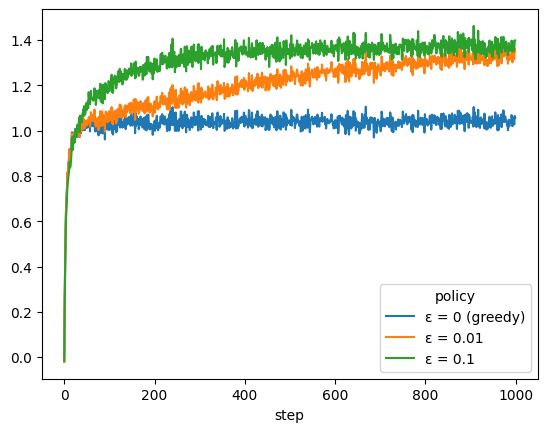

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

/home/runner/work/river/river/.venv/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
  0%|          | 9850/6000000 [00:00<01:00, 98494.22it/s]

  0%|          | 19767/6000000 [00:00<01:00, 98887.21it/s]

  0%|          | 29717/6000000 [00:00<01:00, 99162.84it/s]

  1%|          | 39648/6000000 [00:00<01:00, 99218.17it/s]

  1%|          | 49588/6000000 [00:00<00:59, 99281.38it/s]

  1%|          | 59517/6000000 [00:00<00:59, 99239.62it/s]

  1%|          | 69441/6000000 [00:00<00:59, 99139.66it/s]

  1%|▏         | 79355/6000000 [00:00<00:59, 99130.93it/s]

  1%|▏         | 89269/6000000 [00:00<01:00, 98213.91it/s]

  2%|▏         | 99212/6000000 [00:01<00:59, 98584.90it/s]

  2%|▏         | 109182/6000000 [00:01<00:59, 98923.78it/s]

  2%|▏         | 119188/6000000 [00:01<00:59, 99267.58it/s]

  2%|▏         | 129192/6000000 [00:01<00:59, 99498.68it/s]

  2%|▏         | 139143/6000000 [00:01<00:58, 99430.71it/s]

  2%|▏         | 149088/6000000 [00:01<00:58, 99434.40it/s]

  3%|▎         | 159041/6000000 [00:01<00:58, 99462.10it/s]

  3%|▎         | 169001/6000000 [00:01<00:58, 99412.91it/s]

  3%|▎         | 179001/6000000 [00:01<00:58, 99472.90it/s]

  3%|▎         | 189001/6000000 [00:01<00:58, 99461.82it/s]

  3%|▎         | 199001/6000000 [00:02<00:58, 99566.10it/s]

  3%|▎         | 208958/6000000 [00:02<00:58, 99063.84it/s]

  4%|▎         | 218958/6000000 [00:02<00:58, 99341.16it/s]

  4%|▍         | 228919/6000000 [00:02<00:58, 99421.23it/s]

  4%|▍         | 238862/6000000 [00:02<00:58, 99231.34it/s]

  4%|▍         | 248795/6000000 [00:02<00:57, 99259.96it/s]

  4%|▍         | 258748/6000000 [00:02<00:57, 99339.41it/s]

  4%|▍         | 268683/6000000 [00:02<00:57, 99296.09it/s]

  5%|▍         | 278660/6000000 [00:02<00:57, 99437.32it/s]

  5%|▍         | 288604/6000000 [00:02<00:57, 99280.16it/s]

  5%|▍         | 298557/6000000 [00:03<00:57, 99353.94it/s]

  5%|▌         | 308514/6000000 [00:03<00:57, 99417.07it/s]

  5%|▌         | 318473/6000000 [00:03<00:57, 99466.30it/s]

  5%|▌         | 328456/6000000 [00:03<00:56, 99574.66it/s]

  6%|▌         | 338414/6000000 [00:03<00:56, 99570.95it/s]

  6%|▌         | 348389/6000000 [00:03<00:56, 99624.46it/s]

  6%|▌         | 358355/6000000 [00:03<00:56, 99635.01it/s]

  6%|▌         | 368320/6000000 [00:03<00:56, 99639.25it/s]

  6%|▋         | 378293/6000000 [00:03<00:56, 99664.64it/s]

  6%|▋         | 388270/6000000 [00:03<00:56, 99695.71it/s]

  7%|▋         | 398240/6000000 [00:04<00:56, 99495.29it/s]

  7%|▋         | 408190/6000000 [00:04<00:56, 99363.88it/s]

  7%|▋         | 418127/6000000 [00:04<00:56, 99331.92it/s]

  7%|▋         | 428062/6000000 [00:04<00:56, 99335.94it/s]

  7%|▋         | 437996/6000000 [00:04<00:56, 99246.71it/s]

  7%|▋         | 447921/6000000 [00:04<00:56, 99017.67it/s]

  8%|▊         | 457823/6000000 [00:04<00:55, 99012.74it/s]

  8%|▊         | 467725/6000000 [00:04<00:55, 98824.88it/s]

  8%|▊         | 477627/6000000 [00:04<00:55, 98882.23it/s]

  8%|▊         | 487516/6000000 [00:04<00:56, 96969.18it/s]

  8%|▊         | 497424/6000000 [00:05<00:56, 97591.62it/s]

  8%|▊         | 507310/6000000 [00:05<00:56, 97967.61it/s]

  9%|▊         | 517191/6000000 [00:05<00:55, 98217.65it/s]

  9%|▉         | 527105/6000000 [00:05<00:55, 98492.53it/s]

  9%|▉         | 537047/6000000 [00:05<00:55, 98767.81it/s]

  9%|▉         | 547035/6000000 [00:05<00:55, 99098.17it/s]

  9%|▉         | 557001/6000000 [00:05<00:54, 99239.37it/s]

  9%|▉         | 567001/6000000 [00:05<00:54, 99345.36it/s]

 10%|▉         | 577001/6000000 [00:05<00:54, 99445.35it/s]

 10%|▉         | 586947/6000000 [00:05<00:55, 98040.08it/s]

 10%|▉         | 596962/6000000 [00:06<00:54, 98664.22it/s]

 10%|█         | 606976/6000000 [00:06<00:54, 99102.11it/s]

 10%|█         | 616945/6000000 [00:06<00:54, 99275.47it/s]

 10%|█         | 626948/6000000 [00:06<00:54, 99500.40it/s]

 11%|█         | 636945/6000000 [00:06<00:53, 99640.13it/s]

 11%|█         | 646921/6000000 [00:06<00:53, 99673.35it/s]

 11%|█         | 656890/6000000 [00:06<00:53, 99647.40it/s]

 11%|█         | 666856/6000000 [00:06<00:53, 99579.78it/s]

 11%|█▏        | 676900/6000000 [00:06<00:53, 99834.89it/s]

 11%|█▏        | 686884/6000000 [00:06<00:53, 99750.06it/s]

 12%|█▏        | 696860/6000000 [00:07<00:53, 99701.79it/s]

 12%|█▏        | 706831/6000000 [00:07<00:53, 99570.55it/s]

 12%|█▏        | 716789/6000000 [00:07<00:53, 99537.95it/s]

 12%|█▏        | 726781/6000000 [00:07<00:52, 99649.79it/s]

 12%|█▏        | 736747/6000000 [00:07<00:52, 99640.99it/s]

 12%|█▏        | 746712/6000000 [00:07<00:52, 99597.52it/s]

 13%|█▎        | 756680/6000000 [00:07<00:52, 99620.28it/s]

 13%|█▎        | 766643/6000000 [00:07<00:52, 99613.89it/s]

 13%|█▎        | 776605/6000000 [00:07<00:52, 99497.04it/s]

 13%|█▎        | 786555/6000000 [00:07<00:53, 97874.11it/s]

 13%|█▎        | 796542/6000000 [00:08<00:52, 98448.98it/s]

 13%|█▎        | 806457/6000000 [00:08<00:52, 98654.25it/s]

 14%|█▎        | 816437/6000000 [00:08<00:52, 98994.05it/s]

 14%|█▍        | 826399/6000000 [00:08<00:52, 99180.20it/s]

 14%|█▍        | 836360/6000000 [00:08<00:51, 99308.42it/s]

 14%|█▍        | 846296/6000000 [00:08<00:51, 99321.76it/s]

 14%|█▍        | 856250/6000000 [00:08<00:51, 99386.60it/s]

 14%|█▍        | 866190/6000000 [00:08<00:51, 99345.99it/s]

 15%|█▍        | 876165/6000000 [00:08<00:51, 99464.89it/s]

 15%|█▍        | 886150/6000000 [00:08<00:51, 99579.65it/s]

 15%|█▍        | 896133/6000000 [00:09<00:51, 99654.25it/s]

 15%|█▌        | 906118/6000000 [00:09<00:51, 99712.48it/s]

 15%|█▌        | 916090/6000000 [00:09<00:51, 99612.83it/s]

 15%|█▌        | 926069/6000000 [00:09<00:50, 99665.61it/s]

 16%|█▌        | 936036/6000000 [00:09<00:50, 99634.69it/s]

 16%|█▌        | 946001/6000000 [00:09<00:50, 99566.86it/s]

 16%|█▌        | 956001/6000000 [00:09<00:50, 99618.47it/s]

 16%|█▌        | 965988/6000000 [00:09<00:50, 99693.08it/s]

 16%|█▋        | 975958/6000000 [00:09<00:50, 99376.39it/s]

 16%|█▋        | 985896/6000000 [00:09<00:50, 99088.80it/s]

 17%|█▋        | 995806/6000000 [00:10<00:51, 98039.60it/s]

 17%|█▋        | 1005788/6000000 [00:10<00:50, 98565.75it/s]

 17%|█▋        | 1015802/6000000 [00:10<00:50, 99032.25it/s]

 17%|█▋        | 1025732/6000000 [00:10<00:50, 99110.85it/s]

 17%|█▋        | 1035699/6000000 [00:10<00:50, 99276.33it/s]

 17%|█▋        | 1045637/6000000 [00:10<00:49, 99307.10it/s]

 18%|█▊        | 1055569/6000000 [00:10<00:49, 99216.13it/s]

 18%|█▊        | 1065531/6000000 [00:10<00:49, 99335.04it/s]

 18%|█▊        | 1075465/6000000 [00:10<00:49, 99239.37it/s]

 18%|█▊        | 1085390/6000000 [00:10<00:49, 99149.55it/s]

 18%|█▊        | 1095306/6000000 [00:11<00:49, 98777.45it/s]

 18%|█▊        | 1105223/6000000 [00:11<00:49, 98893.58it/s]

 19%|█▊        | 1115127/6000000 [00:11<00:49, 98935.37it/s]

 19%|█▉        | 1125041/6000000 [00:11<00:49, 98993.63it/s]

 19%|█▉        | 1135023/6000000 [00:11<00:49, 99239.45it/s]

 19%|█▉        | 1145001/6000000 [00:11<00:48, 99304.98it/s]

 19%|█▉        | 1154959/6000000 [00:11<00:48, 99384.78it/s]

 19%|█▉        | 1164898/6000000 [00:11<00:48, 98916.34it/s]

 20%|█▉        | 1174791/6000000 [00:11<00:48, 98737.84it/s]

 20%|█▉        | 1184666/6000000 [00:11<00:48, 98327.07it/s]

 20%|█▉        | 1194500/6000000 [00:12<00:48, 98079.73it/s]

 20%|██        | 1204309/6000000 [00:12<00:49, 97819.27it/s]

 20%|██        | 1214092/6000000 [00:12<00:48, 97778.84it/s]

 20%|██        | 1223871/6000000 [00:12<00:48, 97769.25it/s]

 21%|██        | 1233649/6000000 [00:12<00:48, 97750.68it/s]

 21%|██        | 1243425/6000000 [00:12<00:48, 97648.43it/s]

 21%|██        | 1253217/6000000 [00:12<00:48, 97728.75it/s]

 21%|██        | 1263001/6000000 [00:12<00:48, 97678.54it/s]

 21%|██        | 1272845/6000000 [00:12<00:48, 97904.64it/s]

 21%|██▏       | 1282657/6000000 [00:12<00:48, 97968.98it/s]

 22%|██▏       | 1292454/6000000 [00:13<00:48, 97736.11it/s]

 22%|██▏       | 1302234/6000000 [00:13<00:48, 97752.68it/s]

 22%|██▏       | 1312010/6000000 [00:13<00:48, 97659.71it/s]

 22%|██▏       | 1321875/6000000 [00:13<00:47, 97953.90it/s]

 22%|██▏       | 1331671/6000000 [00:13<00:47, 97776.61it/s]

 22%|██▏       | 1341449/6000000 [00:13<00:47, 97673.30it/s]

 23%|██▎       | 1351237/6000000 [00:13<00:47, 97734.85it/s]

 23%|██▎       | 1361012/6000000 [00:13<00:47, 97738.85it/s]

 23%|██▎       | 1370837/6000000 [00:13<00:47, 97891.98it/s]

 23%|██▎       | 1380627/6000000 [00:13<00:47, 97785.67it/s]

 23%|██▎       | 1390406/6000000 [00:14<00:48, 95876.20it/s]

 23%|██▎       | 1400094/6000000 [00:14<00:47, 96170.98it/s]

 23%|██▎       | 1409931/6000000 [00:14<00:47, 96823.00it/s]

 24%|██▎       | 1419649/6000000 [00:14<00:47, 96928.39it/s]

 24%|██▍       | 1429346/6000000 [00:14<00:47, 96516.31it/s]

 24%|██▍       | 1439187/6000000 [00:14<00:46, 97078.40it/s]

 24%|██▍       | 1448995/6000000 [00:14<00:46, 97374.87it/s]

 24%|██▍       | 1458743/6000000 [00:14<00:46, 97403.97it/s]

 24%|██▍       | 1468489/6000000 [00:14<00:46, 97420.07it/s]

 25%|██▍       | 1478295/6000000 [00:14<00:46, 97611.00it/s]

 25%|██▍       | 1488057/6000000 [00:15<00:46, 97486.48it/s]

 25%|██▍       | 1497829/6000000 [00:15<00:46, 97554.91it/s]

 25%|██▌       | 1507585/6000000 [00:15<00:46, 97478.89it/s]

 25%|██▌       | 1517392/6000000 [00:15<00:45, 97654.46it/s]

 25%|██▌       | 1527158/6000000 [00:15<00:45, 97566.85it/s]

 26%|██▌       | 1536995/6000000 [00:15<00:45, 97807.22it/s]

 26%|██▌       | 1546776/6000000 [00:15<00:45, 97737.40it/s]

 26%|██▌       | 1556550/6000000 [00:15<00:45, 97661.74it/s]

 26%|██▌       | 1566317/6000000 [00:15<00:45, 97590.49it/s]

 26%|██▋       | 1576114/6000000 [00:15<00:45, 97703.92it/s]

 26%|██▋       | 1585885/6000000 [00:16<00:46, 95788.57it/s]

 27%|██▋       | 1595569/6000000 [00:16<00:45, 96097.88it/s]

 27%|██▋       | 1605338/6000000 [00:16<00:45, 96568.40it/s]

 27%|██▋       | 1615056/6000000 [00:16<00:45, 96748.39it/s]

 27%|██▋       | 1624831/6000000 [00:16<00:45, 97046.13it/s]

 27%|██▋       | 1634546/6000000 [00:16<00:44, 97075.76it/s]

 27%|██▋       | 1644256/6000000 [00:16<00:45, 96674.10it/s]

 28%|██▊       | 1654001/6000000 [00:16<00:44, 96888.90it/s]

 28%|██▊       | 1663743/6000000 [00:16<00:44, 97046.40it/s]

 28%|██▊       | 1673535/6000000 [00:16<00:44, 97305.38it/s]

 28%|██▊       | 1683267/6000000 [00:17<00:44, 97295.75it/s]

 28%|██▊       | 1693001/6000000 [00:17<00:44, 97160.93it/s]

 28%|██▊       | 1702798/6000000 [00:17<00:44, 97401.11it/s]

 29%|██▊       | 1712539/6000000 [00:17<00:44, 97222.14it/s]

 29%|██▊       | 1722262/6000000 [00:17<00:44, 96976.77it/s]

 29%|██▉       | 1732001/6000000 [00:17<00:43, 97062.15it/s]

 29%|██▉       | 1741769/6000000 [00:17<00:43, 97246.28it/s]

 29%|██▉       | 1751494/6000000 [00:17<00:43, 97166.12it/s]

 29%|██▉       | 1761211/6000000 [00:17<00:43, 96991.57it/s]

 30%|██▉       | 1771001/6000000 [00:17<00:43, 97106.03it/s]

 30%|██▉       | 1780712/6000000 [00:18<00:44, 95330.59it/s]

 30%|██▉       | 1790398/6000000 [00:18<00:43, 95782.12it/s]

 30%|███       | 1800106/6000000 [00:18<00:43, 96166.54it/s]

 30%|███       | 1809853/6000000 [00:18<00:43, 96552.73it/s]

 30%|███       | 1819512/6000000 [00:18<00:43, 96504.69it/s]

 30%|███       | 1829211/6000000 [00:18<00:43, 96648.20it/s]

 31%|███       | 1839001/6000000 [00:18<00:42, 96972.21it/s]

 31%|███       | 1848802/6000000 [00:18<00:42, 97281.66it/s]

 31%|███       | 1858532/6000000 [00:18<00:42, 97249.82it/s]

 31%|███       | 1868271/6000000 [00:18<00:42, 97289.76it/s]

 31%|███▏      | 1878014/6000000 [00:19<00:42, 97329.03it/s]

 31%|███▏      | 1887792/6000000 [00:19<00:42, 97461.95it/s]

 32%|███▏      | 1897539/6000000 [00:19<00:42, 97013.74it/s]

 32%|███▏      | 1907362/6000000 [00:19<00:42, 97376.91it/s]

 32%|███▏      | 1917170/6000000 [00:19<00:41, 97584.62it/s]

 32%|███▏      | 1927001/6000000 [00:19<00:41, 97781.62it/s]

 32%|███▏      | 1936797/6000000 [00:19<00:41, 97834.53it/s]

 32%|███▏      | 1946581/6000000 [00:19<00:41, 97802.02it/s]

 33%|███▎      | 1956362/6000000 [00:19<00:41, 97778.17it/s]

 33%|███▎      | 1966189/6000000 [00:19<00:41, 97923.45it/s]

 33%|███▎      | 1975982/6000000 [00:20<00:41, 97797.09it/s]

 33%|███▎      | 1985762/6000000 [00:20<00:41, 97716.12it/s]

 33%|███▎      | 1995620/6000000 [00:20<00:40, 97974.22it/s]

 33%|███▎      | 2005418/6000000 [00:20<00:41, 96978.00it/s]

 34%|███▎      | 2015119/6000000 [00:20<00:41, 95277.77it/s]

 34%|███▎      | 2024654/6000000 [00:20<00:42, 94274.87it/s]

 34%|███▍      | 2034088/6000000 [00:20<00:42, 93558.25it/s]

 34%|███▍      | 2043448/6000000 [00:20<00:42, 93215.02it/s]

 34%|███▍      | 2052772/6000000 [00:20<00:42, 92642.95it/s]

 34%|███▍      | 2062038/6000000 [00:21<00:42, 92549.25it/s]

 35%|███▍      | 2071294/6000000 [00:21<00:43, 90771.81it/s]

 35%|███▍      | 2080569/6000000 [00:21<00:42, 91351.24it/s]

 35%|███▍      | 2089858/6000000 [00:21<00:42, 91805.39it/s]

 35%|███▍      | 2099044/6000000 [00:21<00:42, 91590.03it/s]

 35%|███▌      | 2108365/6000000 [00:21<00:42, 92069.67it/s]

 35%|███▌      | 2117575/6000000 [00:21<00:42, 91689.21it/s]

 35%|███▌      | 2126820/6000000 [00:21<00:42, 91915.09it/s]

 36%|███▌      | 2136014/6000000 [00:21<00:42, 91913.79it/s]

 36%|███▌      | 2145207/6000000 [00:21<00:41, 91790.01it/s]

 36%|███▌      | 2154387/6000000 [00:22<00:41, 91726.87it/s]

 36%|███▌      | 2163640/6000000 [00:22<00:41, 91965.46it/s]

 36%|███▌      | 2172927/6000000 [00:22<00:41, 92234.16it/s]

 36%|███▋      | 2182151/6000000 [00:22<00:41, 91586.17it/s]

 37%|███▋      | 2191394/6000000 [00:22<00:41, 91835.28it/s]

 37%|███▋      | 2200579/6000000 [00:22<00:41, 91350.50it/s]

 37%|███▋      | 2210001/6000000 [00:22<00:41, 92102.16it/s]

 37%|███▋      | 2219215/6000000 [00:22<00:41, 92112.10it/s]

 37%|███▋      | 2228427/6000000 [00:22<00:41, 91732.85it/s]

 37%|███▋      | 2237602/6000000 [00:22<00:41, 91555.92it/s]

 37%|███▋      | 2246851/6000000 [00:23<00:40, 91834.22it/s]

 38%|███▊      | 2256035/6000000 [00:23<00:41, 89956.94it/s]

 38%|███▊      | 2265225/6000000 [00:23<00:41, 90527.75it/s]

 38%|███▊      | 2274312/6000000 [00:23<00:41, 90626.40it/s]

 38%|███▊      | 2283453/6000000 [00:23<00:40, 90859.46it/s]

 38%|███▊      | 2292689/6000000 [00:23<00:40, 91306.01it/s]

 38%|███▊      | 2301938/6000000 [00:23<00:40, 91659.23it/s]

 39%|███▊      | 2311107/6000000 [00:23<00:40, 91501.54it/s]

 39%|███▊      | 2320259/6000000 [00:23<00:40, 91246.70it/s]

 39%|███▉      | 2329404/6000000 [00:23<00:40, 91304.91it/s]

 39%|███▉      | 2338657/6000000 [00:24<00:39, 91669.58it/s]

 39%|███▉      | 2347976/6000000 [00:24<00:39, 92124.62it/s]

 39%|███▉      | 2357190/6000000 [00:24<00:39, 91723.44it/s]

 39%|███▉      | 2366394/6000000 [00:24<00:39, 91815.75it/s]

 40%|███▉      | 2375577/6000000 [00:24<00:39, 91465.84it/s]

 40%|███▉      | 2384725/6000000 [00:24<00:39, 91323.30it/s]

 40%|███▉      | 2393858/6000000 [00:24<00:39, 91202.78it/s]

 40%|████      | 2402979/6000000 [00:24<00:39, 91189.57it/s]

 40%|████      | 2412132/6000000 [00:24<00:39, 91290.25it/s]

 40%|████      | 2421262/6000000 [00:24<00:39, 91145.13it/s]

 41%|████      | 2430408/6000000 [00:25<00:39, 91236.96it/s]

 41%|████      | 2439540/6000000 [00:25<00:39, 91261.07it/s]

 41%|████      | 2448667/6000000 [00:25<00:39, 90353.66it/s]

 41%|████      | 2457841/6000000 [00:25<00:39, 90765.08it/s]

 41%|████      | 2466920/6000000 [00:25<00:39, 90472.72it/s]

 41%|████▏     | 2476001/6000000 [00:25<00:38, 90485.89it/s]

 41%|████▏     | 2485119/6000000 [00:25<00:38, 90692.72it/s]

 42%|████▏     | 2494190/6000000 [00:25<00:38, 90539.94it/s]

 42%|████▏     | 2503245/6000000 [00:25<00:38, 90447.77it/s]

 42%|████▏     | 2512291/6000000 [00:25<00:38, 90079.96it/s]

 42%|████▏     | 2521364/6000000 [00:26<00:38, 90273.34it/s]

 42%|████▏     | 2530404/6000000 [00:26<00:38, 90310.00it/s]

 42%|████▏     | 2539436/6000000 [00:26<00:38, 89499.06it/s]

 42%|████▏     | 2548481/6000000 [00:26<00:38, 89781.60it/s]

 43%|████▎     | 2557595/6000000 [00:26<00:38, 90185.09it/s]

 43%|████▎     | 2566854/6000000 [00:26<00:37, 90903.18it/s]

 43%|████▎     | 2576019/6000000 [00:26<00:37, 91124.22it/s]

 43%|████▎     | 2585222/6000000 [00:26<00:37, 91393.74it/s]

 43%|████▎     | 2594403/6000000 [00:26<00:37, 91518.08it/s]

 43%|████▎     | 2603597/6000000 [00:26<00:37, 91642.46it/s]

 44%|████▎     | 2612831/6000000 [00:27<00:36, 91850.48it/s]

 44%|████▎     | 2622017/6000000 [00:27<00:36, 91582.05it/s]

 44%|████▍     | 2631176/6000000 [00:27<00:36, 91236.43it/s]

 44%|████▍     | 2640309/6000000 [00:27<00:36, 91262.98it/s]

 44%|████▍     | 2649493/6000000 [00:27<00:36, 91434.93it/s]

 44%|████▍     | 2658679/6000000 [00:27<00:36, 91559.59it/s]

 44%|████▍     | 2667836/6000000 [00:27<00:36, 91131.88it/s]

 45%|████▍     | 2677001/6000000 [00:27<00:36, 91121.06it/s]

 45%|████▍     | 2686155/6000000 [00:27<00:36, 91244.15it/s]

 45%|████▍     | 2695280/6000000 [00:27<00:36, 91144.73it/s]

 45%|████▌     | 2704483/6000000 [00:28<00:36, 91409.17it/s]

 45%|████▌     | 2713625/6000000 [00:28<00:36, 91166.59it/s]

 45%|████▌     | 2722742/6000000 [00:28<00:36, 88581.88it/s]

 46%|████▌     | 2731874/6000000 [00:28<00:36, 89382.76it/s]

 46%|████▌     | 2741001/6000000 [00:28<00:36, 89809.17it/s]

 46%|████▌     | 2750001/6000000 [00:28<00:36, 89839.34it/s]

 46%|████▌     | 2759109/6000000 [00:28<00:35, 90208.26it/s]

 46%|████▌     | 2768248/6000000 [00:28<00:35, 90559.55it/s]

 46%|████▋     | 2777459/6000000 [00:28<00:35, 91021.62it/s]

 46%|████▋     | 2786658/6000000 [00:28<00:35, 91309.39it/s]

 47%|████▋     | 2795807/6000000 [00:29<00:35, 91362.12it/s]

 47%|████▋     | 2804945/6000000 [00:29<00:35, 91155.40it/s]

 47%|████▋     | 2814062/6000000 [00:29<00:35, 90971.34it/s]

 47%|████▋     | 2823160/6000000 [00:29<00:34, 90955.67it/s]

 47%|████▋     | 2832321/6000000 [00:29<00:34, 91149.69it/s]

 47%|████▋     | 2841627/6000000 [00:29<00:34, 91721.29it/s]

 48%|████▊     | 2850826/6000000 [00:29<00:34, 91800.58it/s]

 48%|████▊     | 2860007/6000000 [00:29<00:34, 91503.61it/s]

 48%|████▊     | 2869158/6000000 [00:29<00:34, 91461.91it/s]

 48%|████▊     | 2878454/6000000 [00:29<00:33, 91910.04it/s]

 48%|████▊     | 2887646/6000000 [00:30<00:33, 91775.10it/s]

 48%|████▊     | 2896824/6000000 [00:30<00:34, 90323.37it/s]

 48%|████▊     | 2905862/6000000 [00:30<00:34, 89649.65it/s]

 49%|████▊     | 2914890/6000000 [00:30<00:34, 89835.33it/s]

 49%|████▊     | 2923934/6000000 [00:30<00:34, 90013.15it/s]

 49%|████▉     | 2932949/6000000 [00:30<00:34, 90053.37it/s]

 49%|████▉     | 2942056/6000000 [00:30<00:33, 90356.10it/s]

 49%|████▉     | 2951134/6000000 [00:30<00:33, 90482.60it/s]

 49%|████▉     | 2960184/6000000 [00:30<00:33, 90411.39it/s]

 49%|████▉     | 2969226/6000000 [00:30<00:33, 90383.81it/s]

 50%|████▉     | 2978328/6000000 [00:31<00:33, 90573.50it/s]

 50%|████▉     | 2987512/6000000 [00:31<00:33, 90952.66it/s]

 50%|████▉     | 2996608/6000000 [00:31<00:33, 89059.11it/s]

 50%|█████     | 3005736/6000000 [00:31<00:33, 89714.63it/s]

 50%|█████     | 3014870/6000000 [00:31<00:33, 90195.80it/s]

 50%|█████     | 3024103/6000000 [00:31<00:32, 90830.46it/s]

 51%|█████     | 3033207/6000000 [00:31<00:32, 90891.59it/s]

 51%|█████     | 3042436/6000000 [00:31<00:32, 91308.08it/s]

 51%|█████     | 3051570/6000000 [00:31<00:32, 90085.00it/s]

 51%|█████     | 3060788/6000000 [00:31<00:32, 90704.81it/s]

 51%|█████     | 3069863/6000000 [00:32<00:32, 90588.89it/s]

 51%|█████▏    | 3078925/6000000 [00:32<00:32, 90503.08it/s]

 51%|█████▏    | 3087978/6000000 [00:32<00:33, 87096.07it/s]

 52%|█████▏    | 3097001/6000000 [00:32<00:33, 87853.54it/s]

 52%|█████▏    | 3106010/6000000 [00:32<00:32, 88508.47it/s]

 52%|█████▏    | 3115122/6000000 [00:32<00:32, 89277.98it/s]

 52%|█████▏    | 3124155/6000000 [00:32<00:32, 89588.98it/s]

 52%|█████▏    | 3133281/6000000 [00:32<00:31, 90083.72it/s]

 52%|█████▏    | 3142338/6000000 [00:32<00:31, 90227.15it/s]

 53%|█████▎    | 3151574/6000000 [00:32<00:31, 90863.35it/s]

 53%|█████▎    | 3160665/6000000 [00:33<00:31, 90750.53it/s]

 53%|█████▎    | 3169777/6000000 [00:33<00:31, 90860.94it/s]

 53%|█████▎    | 3179001/6000000 [00:33<00:30, 91158.61it/s]

 53%|█████▎    | 3188138/6000000 [00:33<00:30, 91220.28it/s]

 53%|█████▎    | 3197288/6000000 [00:33<00:30, 91303.89it/s]

 53%|█████▎    | 3206420/6000000 [00:33<00:30, 91144.13it/s]

 54%|█████▎    | 3215631/6000000 [00:33<00:30, 91433.25it/s]

 54%|█████▎    | 3224796/6000000 [00:33<00:30, 91497.69it/s]

 54%|█████▍    | 3234001/6000000 [00:33<00:30, 91536.22it/s]

 54%|█████▍    | 3243155/6000000 [00:33<00:30, 91168.14it/s]

 54%|█████▍    | 3252273/6000000 [00:34<00:30, 91157.23it/s]

 54%|█████▍    | 3261397/6000000 [00:34<00:30, 91179.87it/s]

 55%|█████▍    | 3270516/6000000 [00:34<00:30, 90757.06it/s]

 55%|█████▍    | 3279632/6000000 [00:34<00:29, 90876.55it/s]

 55%|█████▍    | 3288781/6000000 [00:34<00:29, 91058.77it/s]

 55%|█████▍    | 3297997/6000000 [00:34<00:29, 91387.29it/s]

 55%|█████▌    | 3307137/6000000 [00:34<00:29, 91248.49it/s]

 55%|█████▌    | 3316263/6000000 [00:34<00:29, 90964.57it/s]

 55%|█████▌    | 3325525/6000000 [00:34<00:29, 91456.09it/s]

 56%|█████▌    | 3334799/6000000 [00:35<00:29, 91839.48it/s]

 56%|█████▌    | 3343984/6000000 [00:35<00:28, 91645.39it/s]

 56%|█████▌    | 3353177/6000000 [00:35<00:28, 91727.88it/s]

 56%|█████▌    | 3362470/6000000 [00:35<00:28, 92085.78it/s]

 56%|█████▌    | 3371679/6000000 [00:35<00:29, 90227.33it/s]

 56%|█████▋    | 3380811/6000000 [00:35<00:28, 90547.43it/s]

 56%|█████▋    | 3389873/6000000 [00:35<00:28, 90375.74it/s]

 57%|█████▋    | 3399041/6000000 [00:35<00:28, 90762.62it/s]

 57%|█████▋    | 3408223/6000000 [00:35<00:28, 91076.49it/s]

 57%|█████▋    | 3417402/6000000 [00:35<00:28, 91289.49it/s]

 57%|█████▋    | 3426584/6000000 [00:36<00:28, 91445.69it/s]

 57%|█████▋    | 3435730/6000000 [00:36<00:28, 91344.33it/s]

 57%|█████▋    | 3444866/6000000 [00:36<00:28, 91236.15it/s]

 58%|█████▊    | 3453991/6000000 [00:36<00:27, 90947.10it/s]

 58%|█████▊    | 3463087/6000000 [00:36<00:28, 90567.09it/s]

 58%|█████▊    | 3472279/6000000 [00:36<00:27, 90967.48it/s]

 58%|█████▊    | 3481476/6000000 [00:36<00:27, 91265.42it/s]

 58%|█████▊    | 3490700/6000000 [00:36<00:27, 91556.78it/s]

 58%|█████▊    | 3499879/6000000 [00:36<00:27, 91625.92it/s]

 58%|█████▊    | 3509042/6000000 [00:36<00:27, 91338.23it/s]

 59%|█████▊    | 3518277/6000000 [00:37<00:27, 91637.42it/s]

 59%|█████▉    | 3527492/6000000 [00:37<00:26, 91788.51it/s]

 59%|█████▉    | 3536672/6000000 [00:37<00:26, 91672.83it/s]

 59%|█████▉    | 3545948/6000000 [00:37<00:26, 91994.01it/s]

 59%|█████▉    | 3555148/6000000 [00:37<00:26, 91836.12it/s]

 59%|█████▉    | 3564332/6000000 [00:37<00:26, 91467.65it/s]

 60%|█████▉    | 3573480/6000000 [00:37<00:26, 90944.70it/s]

 60%|█████▉    | 3582576/6000000 [00:37<00:26, 90841.48it/s]

 60%|█████▉    | 3591661/6000000 [00:37<00:26, 90761.83it/s]

 60%|██████    | 3600874/6000000 [00:37<00:26, 91169.98it/s]

 60%|██████    | 3609992/6000000 [00:38<00:26, 91046.11it/s]

 60%|██████    | 3619097/6000000 [00:38<00:26, 90623.94it/s]

 60%|██████    | 3628160/6000000 [00:38<00:26, 90483.41it/s]

 61%|██████    | 3637275/6000000 [00:38<00:26, 90682.09it/s]

 61%|██████    | 3646344/6000000 [00:38<00:25, 90543.54it/s]

 61%|██████    | 3655551/6000000 [00:38<00:25, 90998.06it/s]

 61%|██████    | 3664699/6000000 [00:38<00:25, 91142.05it/s]

 61%|██████    | 3673891/6000000 [00:38<00:25, 91372.90it/s]

 61%|██████▏   | 3683029/6000000 [00:38<00:25, 91251.85it/s]

 62%|██████▏   | 3692155/6000000 [00:38<00:25, 91055.78it/s]

 62%|██████▏   | 3701385/6000000 [00:39<00:25, 91426.33it/s]

 62%|██████▏   | 3710529/6000000 [00:39<00:25, 91428.10it/s]

 62%|██████▏   | 3719880/6000000 [00:39<00:24, 92051.23it/s]

 62%|██████▏   | 3729086/6000000 [00:39<00:24, 91658.56it/s]

 62%|██████▏   | 3738253/6000000 [00:39<00:25, 88112.85it/s]

 62%|██████▏   | 3747544/6000000 [00:39<00:25, 89508.64it/s]

 63%|██████▎   | 3756790/6000000 [00:39<00:24, 90373.36it/s]

 63%|██████▎   | 3766001/6000000 [00:39<00:24, 90846.40it/s]

 63%|██████▎   | 3775129/6000000 [00:39<00:24, 90974.40it/s]

 63%|██████▎   | 3784237/6000000 [00:39<00:24, 90923.25it/s]

 63%|██████▎   | 3793337/6000000 [00:40<00:24, 90939.18it/s]

 63%|██████▎   | 3802436/6000000 [00:40<00:24, 90896.45it/s]

 64%|██████▎   | 3811704/6000000 [00:40<00:23, 91427.50it/s]

 64%|██████▎   | 3820850/6000000 [00:40<00:23, 91417.16it/s]

 64%|██████▍   | 3829994/6000000 [00:40<00:23, 91373.79it/s]

 64%|██████▍   | 3839133/6000000 [00:40<00:23, 90966.40it/s]

 64%|██████▍   | 3848266/6000000 [00:40<00:23, 91074.26it/s]

 64%|██████▍   | 3857437/6000000 [00:40<00:23, 91262.73it/s]

 64%|██████▍   | 3866564/6000000 [00:40<00:23, 91075.06it/s]

 65%|██████▍   | 3875897/6000000 [00:40<00:23, 91749.31it/s]

 65%|██████▍   | 3885093/6000000 [00:41<00:23, 91811.82it/s]

 65%|██████▍   | 3894275/6000000 [00:41<00:23, 91353.92it/s]

 65%|██████▌   | 3903412/6000000 [00:41<00:22, 91327.15it/s]

 65%|██████▌   | 3912546/6000000 [00:41<00:22, 91129.45it/s]

 65%|██████▌   | 3921660/6000000 [00:41<00:23, 89120.73it/s]

 66%|██████▌   | 3930671/6000000 [00:41<00:23, 89411.98it/s]

 66%|██████▌   | 3939620/6000000 [00:41<00:23, 88782.69it/s]

 66%|██████▌   | 3948649/6000000 [00:41<00:22, 89227.63it/s]

 66%|██████▌   | 3957577/6000000 [00:41<00:23, 86913.65it/s]

 66%|██████▌   | 3966810/6000000 [00:41<00:22, 88496.87it/s]

 66%|██████▋   | 3975973/6000000 [00:42<00:22, 89419.10it/s]

 66%|██████▋   | 3985042/6000000 [00:42<00:22, 89795.15it/s]

 67%|██████▋   | 3994186/6000000 [00:42<00:22, 90283.18it/s]

 67%|██████▋   | 4003387/6000000 [00:42<00:21, 90796.03it/s]

 67%|██████▋   | 4012847/6000000 [00:42<00:21, 91931.67it/s]

 67%|██████▋   | 4022045/6000000 [00:42<00:22, 89786.33it/s]

 67%|██████▋   | 4031448/6000000 [00:42<00:21, 91033.11it/s]

 67%|██████▋   | 4040975/6000000 [00:42<00:21, 92287.32it/s]

 68%|██████▊   | 4050550/6000000 [00:42<00:20, 93314.75it/s]

 68%|██████▊   | 4060020/6000000 [00:42<00:20, 93725.38it/s]

 68%|██████▊   | 4069614/6000000 [00:43<00:20, 94384.53it/s]

 68%|██████▊   | 4079057/6000000 [00:43<00:20, 94128.31it/s]

 68%|██████▊   | 4088605/6000000 [00:43<00:20, 94531.78it/s]

 68%|██████▊   | 4098061/6000000 [00:43<00:20, 92116.17it/s]

 68%|██████▊   | 4107288/6000000 [00:43<00:22, 85730.21it/s]

 69%|██████▊   | 4115952/6000000 [00:43<00:22, 84542.95it/s]

 69%|██████▊   | 4124934/6000000 [00:43<00:21, 86035.34it/s]

 69%|██████▉   | 4134472/6000000 [00:43<00:21, 88724.74it/s]

 69%|██████▉   | 4143949/6000000 [00:43<00:20, 90484.35it/s]

 69%|██████▉   | 4153414/6000000 [00:44<00:20, 91706.78it/s]

 69%|██████▉   | 4162802/6000000 [00:44<00:19, 92349.24it/s]

 70%|██████▉   | 4172307/6000000 [00:44<00:19, 93150.09it/s]

 70%|██████▉   | 4181822/6000000 [00:44<00:19, 93744.98it/s]

 70%|██████▉   | 4191209/6000000 [00:44<00:19, 93493.41it/s]

 70%|███████   | 4200567/6000000 [00:44<00:19, 91167.06it/s]

 70%|███████   | 4209880/6000000 [00:44<00:19, 91742.45it/s]

 70%|███████   | 4219222/6000000 [00:44<00:19, 92237.21it/s]

 70%|███████   | 4228689/6000000 [00:44<00:19, 92958.06it/s]

 71%|███████   | 4238200/6000000 [00:44<00:18, 93597.40it/s]

 71%|███████   | 4247582/6000000 [00:45<00:18, 93662.65it/s]

 71%|███████   | 4256992/6000000 [00:45<00:18, 93792.72it/s]

 71%|███████   | 4266375/6000000 [00:45<00:18, 93632.24it/s]

 71%|███████▏  | 4275911/6000000 [00:45<00:18, 94148.17it/s]

 71%|███████▏  | 4285390/6000000 [00:45<00:18, 94338.04it/s]

 72%|███████▏  | 4294826/6000000 [00:45<00:18, 94244.16it/s]

 72%|███████▏  | 4304252/6000000 [00:45<00:18, 93740.89it/s]

 72%|███████▏  | 4313644/6000000 [00:45<00:17, 93792.24it/s]

 72%|███████▏  | 4323125/6000000 [00:45<00:17, 94094.16it/s]

 72%|███████▏  | 4332685/6000000 [00:45<00:17, 94542.18it/s]

 72%|███████▏  | 4342158/6000000 [00:46<00:17, 94596.22it/s]

 73%|███████▎  | 4351649/6000000 [00:46<00:17, 94688.03it/s]

 73%|███████▎  | 4361119/6000000 [00:46<00:17, 94581.34it/s]

 73%|███████▎  | 4370578/6000000 [00:46<00:17, 94291.88it/s]

 73%|███████▎  | 4380169/6000000 [00:46<00:17, 94774.45it/s]

 73%|███████▎  | 4389647/6000000 [00:46<00:17, 94455.01it/s]

 73%|███████▎  | 4399093/6000000 [00:46<00:16, 94294.15it/s]

 73%|███████▎  | 4408823/6000000 [00:46<00:16, 95192.23it/s]

 74%|███████▎  | 4418343/6000000 [00:46<00:16, 94529.63it/s]

 74%|███████▍  | 4427919/6000000 [00:46<00:16, 94894.83it/s]

 74%|███████▍  | 4437410/6000000 [00:47<00:16, 94700.06it/s]

 74%|███████▍  | 4446881/6000000 [00:47<00:16, 94074.55it/s]

 74%|███████▍  | 4456290/6000000 [00:47<00:16, 93858.95it/s]

 74%|███████▍  | 4465677/6000000 [00:47<00:16, 93598.82it/s]

 75%|███████▍  | 4475094/6000000 [00:47<00:16, 93766.99it/s]

 75%|███████▍  | 4484496/6000000 [00:47<00:16, 93837.87it/s]

 75%|███████▍  | 4493881/6000000 [00:47<00:16, 92316.92it/s]

 75%|███████▌  | 4503258/6000000 [00:47<00:16, 92745.90it/s]

 75%|███████▌  | 4512828/6000000 [00:47<00:15, 93621.06it/s]

 75%|███████▌  | 4522194/6000000 [00:47<00:15, 93540.66it/s]

 76%|███████▌  | 4531551/6000000 [00:48<00:15, 93117.18it/s]

 76%|███████▌  | 4540906/6000000 [00:48<00:15, 93243.95it/s]

 76%|███████▌  | 4550575/6000000 [00:48<00:15, 94271.96it/s]

 76%|███████▌  | 4560004/6000000 [00:48<00:15, 93936.65it/s]

 76%|███████▌  | 4569408/6000000 [00:48<00:15, 93964.72it/s]

 76%|███████▋  | 4578806/6000000 [00:48<00:15, 93811.58it/s]

 76%|███████▋  | 4588188/6000000 [00:48<00:15, 93707.54it/s]

 77%|███████▋  | 4597565/6000000 [00:48<00:14, 93722.24it/s]

 77%|███████▋  | 4606938/6000000 [00:48<00:14, 93699.31it/s]

 77%|███████▋  | 4616329/6000000 [00:48<00:14, 93759.95it/s]

 77%|███████▋  | 4625806/6000000 [00:49<00:14, 94060.51it/s]

 77%|███████▋  | 4635213/6000000 [00:49<00:14, 93824.16it/s]

 77%|███████▋  | 4644602/6000000 [00:49<00:14, 93843.56it/s]

 78%|███████▊  | 4654106/6000000 [00:49<00:14, 94200.63it/s]

 78%|███████▊  | 4664001/6000000 [00:49<00:13, 95464.78it/s]

 78%|███████▊  | 4673548/6000000 [00:49<00:13, 95189.48it/s]

 78%|███████▊  | 4683067/6000000 [00:49<00:13, 94425.87it/s]

 78%|███████▊  | 4692539/6000000 [00:49<00:13, 94511.01it/s]

 78%|███████▊  | 4701992/6000000 [00:49<00:13, 94513.68it/s]

 79%|███████▊  | 4711468/6000000 [00:49<00:13, 94587.17it/s]

 79%|███████▊  | 4720928/6000000 [00:50<00:13, 94234.47it/s]

 79%|███████▉  | 4730352/6000000 [00:50<00:13, 94138.96it/s]

 79%|███████▉  | 4739767/6000000 [00:50<00:13, 94124.18it/s]

 79%|███████▉  | 4749180/6000000 [00:50<00:13, 93974.15it/s]

 79%|███████▉  | 4758807/6000000 [00:50<00:13, 94658.12it/s]

 79%|███████▉  | 4768274/6000000 [00:50<00:13, 94404.68it/s]

 80%|███████▉  | 4777715/6000000 [00:50<00:13, 92596.94it/s]

 80%|███████▉  | 4787015/6000000 [00:50<00:13, 92712.11it/s]

 80%|███████▉  | 4796443/6000000 [00:50<00:12, 93175.12it/s]

 80%|████████  | 4805939/6000000 [00:50<00:12, 93705.32it/s]

 80%|████████  | 4815320/6000000 [00:51<00:12, 93735.51it/s]

 80%|████████  | 4824914/6000000 [00:51<00:12, 94392.76it/s]

 81%|████████  | 4834401/6000000 [00:51<00:12, 94533.61it/s]

 81%|████████  | 4843856/6000000 [00:51<00:12, 94127.25it/s]

 81%|████████  | 4853271/6000000 [00:51<00:12, 94107.00it/s]

 81%|████████  | 4862735/6000000 [00:51<00:12, 94265.66it/s]

 81%|████████  | 4872163/6000000 [00:51<00:11, 94236.49it/s]

 81%|████████▏ | 4881588/6000000 [00:51<00:11, 93754.56it/s]

 82%|████████▏ | 4891129/6000000 [00:51<00:11, 94246.49it/s]

 82%|████████▏ | 4900555/6000000 [00:51<00:11, 94219.87it/s]

 82%|████████▏ | 4909978/6000000 [00:52<00:11, 93811.30it/s]

 82%|████████▏ | 4919396/6000000 [00:52<00:11, 93919.65it/s]

 82%|████████▏ | 4928789/6000000 [00:52<00:11, 93440.50it/s]

 82%|████████▏ | 4938161/6000000 [00:52<00:11, 93521.95it/s]

 82%|████████▏ | 4947801/6000000 [00:52<00:11, 94381.40it/s]

 83%|████████▎ | 4957275/6000000 [00:52<00:11, 94487.74it/s]

 83%|████████▎ | 4966725/6000000 [00:52<00:10, 94425.19it/s]

 83%|████████▎ | 4976168/6000000 [00:52<00:10, 93421.57it/s]

 83%|████████▎ | 4985559/6000000 [00:52<00:10, 93565.37it/s]

 83%|████████▎ | 4994939/6000000 [00:52<00:10, 93634.55it/s]

 83%|████████▎ | 5004304/6000000 [00:53<00:10, 93563.04it/s]

 84%|████████▎ | 5013677/6000000 [00:53<00:10, 93610.23it/s]

 84%|████████▎ | 5023039/6000000 [00:53<00:10, 93224.31it/s]

 84%|████████▍ | 5032419/6000000 [00:53<00:10, 93394.70it/s]

 84%|████████▍ | 5041760/6000000 [00:53<00:10, 93008.83it/s]

 84%|████████▍ | 5051221/6000000 [00:53<00:10, 93485.63it/s]

 84%|████████▍ | 5060628/6000000 [00:53<00:10, 93659.45it/s]

 84%|████████▍ | 5069995/6000000 [00:53<00:10, 92760.72it/s]

 85%|████████▍ | 5079328/6000000 [00:53<00:09, 92928.69it/s]

 85%|████████▍ | 5088623/6000000 [00:53<00:09, 92745.76it/s]

 85%|████████▍ | 5098098/6000000 [00:54<00:09, 93341.54it/s]

 85%|████████▌ | 5107586/6000000 [00:54<00:09, 93799.00it/s]

 85%|████████▌ | 5116967/6000000 [00:54<00:09, 93507.53it/s]

 85%|████████▌ | 5126319/6000000 [00:54<00:09, 92972.43it/s]

 86%|████████▌ | 5136001/6000000 [00:54<00:09, 93949.07it/s]

 86%|████████▌ | 5145397/6000000 [00:54<00:09, 93696.66it/s]

 86%|████████▌ | 5154768/6000000 [00:54<00:09, 93535.38it/s]

 86%|████████▌ | 5164123/6000000 [00:54<00:08, 93137.85it/s]

 86%|████████▌ | 5173497/6000000 [00:54<00:08, 93316.21it/s]

 86%|████████▋ | 5182999/6000000 [00:54<00:08, 93824.69it/s]

 87%|████████▋ | 5192383/6000000 [00:55<00:08, 93455.84it/s]

 87%|████████▋ | 5202001/6000000 [00:55<00:08, 94164.23it/s]

 87%|████████▋ | 5211470/6000000 [00:55<00:08, 94319.61it/s]

 87%|████████▋ | 5220903/6000000 [00:55<00:08, 93996.41it/s]

 87%|████████▋ | 5230304/6000000 [00:55<00:08, 93807.74it/s]

 87%|████████▋ | 5239699/6000000 [00:55<00:08, 93848.44it/s]

 87%|████████▋ | 5249320/6000000 [00:55<00:07, 94552.12it/s]

 88%|████████▊ | 5258776/6000000 [00:55<00:08, 91003.38it/s]

 88%|████████▊ | 5268049/6000000 [00:55<00:07, 91505.02it/s]

 88%|████████▊ | 5277437/6000000 [00:55<00:07, 92201.86it/s]

 88%|████████▊ | 5286753/6000000 [00:56<00:07, 92483.28it/s]

 88%|████████▊ | 5296170/6000000 [00:56<00:07, 92982.08it/s]

 88%|████████▊ | 5305523/6000000 [00:56<00:07, 93145.14it/s]

 89%|████████▊ | 5315001/6000000 [00:56<00:07, 93486.91it/s]

 89%|████████▊ | 5324355/6000000 [00:56<00:07, 93428.68it/s]

 89%|████████▉ | 5333825/6000000 [00:56<00:07, 93807.22it/s]

 89%|████████▉ | 5343422/6000000 [00:56<00:06, 94451.89it/s]

 89%|████████▉ | 5352987/6000000 [00:56<00:06, 94809.40it/s]

 89%|████████▉ | 5362470/6000000 [00:56<00:06, 94397.13it/s]

 90%|████████▉ | 5371911/6000000 [00:57<00:06, 94384.53it/s]

 90%|████████▉ | 5381351/6000000 [00:57<00:06, 94277.77it/s]

 90%|████████▉ | 5390780/6000000 [00:57<00:06, 93862.13it/s]

 90%|█████████ | 5400167/6000000 [00:57<00:06, 93542.01it/s]

 90%|█████████ | 5409653/6000000 [00:57<00:06, 93933.06it/s]

 90%|█████████ | 5419047/6000000 [00:57<00:06, 93840.18it/s]

 90%|█████████ | 5428432/6000000 [00:57<00:06, 93750.28it/s]

 91%|█████████ | 5438001/6000000 [00:57<00:05, 94158.08it/s]

 91%|█████████ | 5447417/6000000 [00:57<00:06, 91642.06it/s]

 91%|█████████ | 5457001/6000000 [00:57<00:05, 92844.26it/s]

 91%|█████████ | 5466518/6000000 [00:58<00:05, 93530.57it/s]

 91%|█████████▏| 5476001/6000000 [00:58<00:05, 93860.92it/s]

 91%|█████████▏| 5485395/6000000 [00:58<00:05, 93780.47it/s]

 92%|█████████▏| 5494778/6000000 [00:58<00:05, 93710.02it/s]

 92%|█████████▏| 5504194/6000000 [00:58<00:05, 93843.15it/s]

 92%|█████████▏| 5513581/6000000 [00:58<00:05, 93626.46it/s]

 92%|█████████▏| 5522946/6000000 [00:58<00:05, 93620.59it/s]

 92%|█████████▏| 5532421/6000000 [00:58<00:04, 93955.60it/s]

 92%|█████████▏| 5541818/6000000 [00:58<00:04, 93725.54it/s]

 93%|█████████▎| 5551192/6000000 [00:58<00:04, 93211.48it/s]

 93%|█████████▎| 5560651/6000000 [00:59<00:04, 93621.59it/s]

 93%|█████████▎| 5570030/6000000 [00:59<00:04, 93669.45it/s]

 93%|█████████▎| 5579398/6000000 [00:59<00:04, 93463.70it/s]

 93%|█████████▎| 5588757/6000000 [00:59<00:04, 93499.28it/s]

 93%|█████████▎| 5598108/6000000 [00:59<00:04, 93345.35it/s]

 93%|█████████▎| 5607443/6000000 [00:59<00:04, 92821.34it/s]

 94%|█████████▎| 5616726/6000000 [00:59<00:04, 92790.31it/s]

 94%|█████████▍| 5626006/6000000 [00:59<00:04, 91989.73it/s]

 94%|█████████▍| 5635207/6000000 [00:59<00:03, 91630.39it/s]

 94%|█████████▍| 5644372/6000000 [00:59<00:04, 88299.77it/s]

 94%|█████████▍| 5653568/6000000 [01:00<00:03, 89360.27it/s]

 94%|█████████▍| 5662830/6000000 [01:00<00:03, 90314.52it/s]

 95%|█████████▍| 5671978/6000000 [01:00<00:03, 90656.73it/s]

 95%|█████████▍| 5681117/6000000 [01:00<00:03, 90872.84it/s]

 95%|█████████▍| 5690559/6000000 [01:00<00:03, 91927.58it/s]

 95%|█████████▍| 5699905/6000000 [01:00<00:03, 92384.30it/s]

 95%|█████████▌| 5709161/6000000 [01:00<00:03, 92436.37it/s]

 95%|█████████▌| 5718409/6000000 [01:00<00:03, 92218.11it/s]

 95%|█████████▌| 5727634/6000000 [01:00<00:02, 91987.55it/s]

 96%|█████████▌| 5736835/6000000 [01:00<00:02, 89367.37it/s]

 96%|█████████▌| 5746141/6000000 [01:01<00:02, 90447.83it/s]

 96%|█████████▌| 5755401/6000000 [01:01<00:02, 91082.49it/s]

 96%|█████████▌| 5764697/6000000 [01:01<00:02, 91637.34it/s]

 96%|█████████▌| 5774001/6000000 [01:01<00:02, 92009.91it/s]

 96%|█████████▋| 5783475/6000000 [01:01<00:02, 92823.23it/s]

 97%|█████████▋| 5792763/6000000 [01:01<00:02, 92713.30it/s]

 97%|█████████▋| 5802111/6000000 [01:01<00:02, 92941.44it/s]

 97%|█████████▋| 5811566/6000000 [01:01<00:02, 93420.64it/s]

 97%|█████████▋| 5821012/6000000 [01:01<00:01, 93730.86it/s]

 97%|█████████▋| 5830387/6000000 [01:01<00:01, 88664.51it/s]

 97%|█████████▋| 5839583/6000000 [01:02<00:01, 89612.96it/s]

 97%|█████████▋| 5849082/6000000 [01:02<00:01, 91178.86it/s]

 98%|█████████▊| 5858359/6000000 [01:02<00:01, 91644.23it/s]

 98%|█████████▊| 5867550/6000000 [01:02<00:01, 91655.58it/s]

 98%|█████████▊| 5877027/6000000 [01:02<00:01, 92579.40it/s]

 98%|█████████▊| 5886464/6000000 [01:02<00:01, 93110.73it/s]

 98%|█████████▊| 5895785/6000000 [01:02<00:01, 92891.58it/s]

 98%|█████████▊| 5905082/6000000 [01:02<00:01, 92884.81it/s]

 99%|█████████▊| 5914376/6000000 [01:02<00:00, 92659.87it/s]

 99%|█████████▊| 5923654/6000000 [01:02<00:00, 92692.53it/s]

 99%|█████████▉| 5933001/6000000 [01:03<00:00, 92880.34it/s]

 99%|█████████▉| 5942439/6000000 [01:03<00:00, 93326.28it/s]

 99%|█████████▉| 5951773/6000000 [01:03<00:00, 93204.72it/s]

 99%|█████████▉| 5961095/6000000 [01:03<00:00, 92820.49it/s]

100%|█████████▉| 5970378/6000000 [01:03<00:00, 92748.46it/s]

100%|█████████▉| 5979777/6000000 [01:03<00:00, 93117.31it/s]

100%|█████████▉| 5989090/6000000 [01:03<00:00, 93101.67it/s]

100%|█████████▉| 5998401/6000000 [01:03<00:00, 92808.65it/s]

100%|██████████| 6000000/6000000 [01:03<00:00, 94049.03it/s]

<Axes: xlabel='step'>

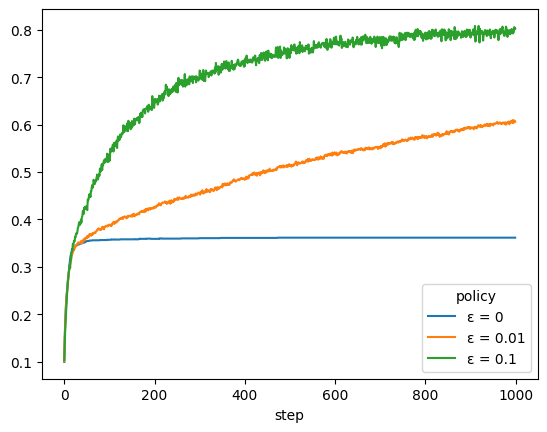

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

/home/runner/work/river/river/.venv/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
  0%|          | 711/180000 [00:00<00:25, 7108.67it/s]

  1%|          | 1461/180000 [00:00<00:24, 7328.81it/s]

  1%|          | 2208/180000 [00:00<00:24, 7388.23it/s]

  2%|▏         | 2949/180000 [00:00<00:23, 7389.00it/s]

  2%|▏         | 3690/180000 [00:00<00:23, 7395.55it/s]

  2%|▏         | 4431/180000 [00:00<00:23, 7395.24it/s]

  3%|▎         | 5176/180000 [00:00<00:23, 7412.51it/s]

  3%|▎         | 5918/180000 [00:00<00:23, 7413.45it/s]

  4%|▎         | 6660/180000 [00:00<00:23, 7287.90it/s]

  4%|▍         | 7398/180000 [00:01<00:23, 7312.03it/s]

  5%|▍         | 8130/180000 [00:01<00:23, 7299.55it/s]

  5%|▍         | 8862/180000 [00:01<00:23, 7302.53it/s]

  5%|▌         | 9593/180000 [00:01<00:23, 7298.50it/s]

  6%|▌         | 10323/180000 [00:01<00:23, 7247.92it/s]

  6%|▌         | 11048/180000 [00:01<00:23, 7243.46it/s]

  7%|▋         | 11773/180000 [00:01<00:23, 7230.79it/s]

  7%|▋         | 12497/180000 [00:01<00:23, 7136.97it/s]

  7%|▋         | 13239/180000 [00:01<00:23, 7218.15it/s]

  8%|▊         | 13962/180000 [00:01<00:23, 7216.28it/s]

  8%|▊         | 14684/180000 [00:02<00:22, 7216.75it/s]

  9%|▊         | 15421/180000 [00:02<00:22, 7262.03it/s]

  9%|▉         | 16155/180000 [00:02<00:22, 7283.71it/s]

  9%|▉         | 16884/180000 [00:02<00:22, 7267.88it/s]

 10%|▉         | 17611/180000 [00:02<00:22, 7228.88it/s]

 10%|█         | 18334/180000 [00:02<00:23, 6916.91it/s]

 11%|█         | 19032/180000 [00:02<00:23, 6932.94it/s]

 11%|█         | 19779/180000 [00:02<00:22, 7085.18it/s]

 11%|█▏        | 20514/180000 [00:02<00:22, 7162.17it/s]

 12%|█▏        | 21250/180000 [00:02<00:21, 7219.78it/s]

 12%|█▏        | 21990/180000 [00:03<00:21, 7272.25it/s]

 13%|█▎        | 22731/180000 [00:03<00:21, 7310.07it/s]

 13%|█▎        | 23466/180000 [00:03<00:21, 7320.07it/s]

 13%|█▎        | 24199/180000 [00:03<00:21, 7131.37it/s]

 14%|█▍        | 24954/180000 [00:03<00:21, 7249.15it/s]

 14%|█▍        | 25681/180000 [00:03<00:21, 7162.82it/s]

 15%|█▍        | 26399/180000 [00:03<00:21, 7139.97it/s]

 15%|█▌        | 27120/180000 [00:03<00:21, 7154.98it/s]

 15%|█▌        | 27852/180000 [00:03<00:21, 7197.43it/s]

 16%|█▌        | 28584/180000 [00:03<00:20, 7230.05it/s]

 16%|█▋        | 29308/180000 [00:04<00:20, 7212.72it/s]

 17%|█▋        | 30030/180000 [00:04<00:21, 6953.48it/s]

 17%|█▋        | 30728/180000 [00:04<00:25, 5931.63it/s]

 17%|█▋        | 31440/180000 [00:04<00:23, 6242.09it/s]

 18%|█▊        | 32126/180000 [00:04<00:23, 6409.31it/s]

 18%|█▊        | 32841/180000 [00:04<00:22, 6613.59it/s]

 19%|█▊        | 33561/180000 [00:04<00:21, 6777.18it/s]

 19%|█▉        | 34272/180000 [00:04<00:21, 6870.31it/s]

 19%|█▉        | 34971/180000 [00:04<00:21, 6900.55it/s]

 20%|█▉        | 35684/180000 [00:05<00:20, 6967.62it/s]

 20%|██        | 36385/180000 [00:05<00:20, 6901.09it/s]

 21%|██        | 37131/180000 [00:05<00:20, 7062.02it/s]

 21%|██        | 37860/180000 [00:05<00:19, 7126.90it/s]

 21%|██▏       | 38587/180000 [00:05<00:19, 7168.58it/s]

 22%|██▏       | 39318/180000 [00:05<00:19, 7208.67it/s]

 22%|██▏       | 40047/180000 [00:05<00:19, 7228.73it/s]

 23%|██▎       | 40773/180000 [00:05<00:19, 7232.73it/s]

 23%|██▎       | 41502/180000 [00:05<00:19, 7249.18it/s]

 23%|██▎       | 42228/180000 [00:05<00:19, 7052.15it/s]

 24%|██▍       | 42978/180000 [00:06<00:19, 7182.09it/s]

 24%|██▍       | 43698/180000 [00:06<00:18, 7178.52it/s]

 25%|██▍       | 44417/180000 [00:06<00:18, 7169.17it/s]

 25%|██▌       | 45147/180000 [00:06<00:18, 7204.51it/s]

 25%|██▌       | 45868/180000 [00:06<00:18, 7181.90it/s]

 26%|██▌       | 46587/180000 [00:06<00:18, 7172.53it/s]

 26%|██▋       | 47305/180000 [00:06<00:18, 7136.29it/s]

 27%|██▋       | 48019/180000 [00:06<00:19, 6839.18it/s]

 27%|██▋       | 48810/180000 [00:06<00:18, 7145.25it/s]

 28%|██▊       | 49528/180000 [00:06<00:18, 7134.54it/s]

 28%|██▊       | 50244/180000 [00:07<00:18, 7126.64it/s]

 28%|██▊       | 50959/180000 [00:07<00:18, 7120.31it/s]

 29%|██▊       | 51672/180000 [00:07<00:18, 7114.70it/s]

 29%|██▉       | 52385/180000 [00:07<00:17, 7113.00it/s]

 29%|██▉       | 53097/180000 [00:07<00:17, 7096.95it/s]

 30%|██▉       | 53808/180000 [00:07<00:17, 7071.30it/s]

 30%|███       | 54516/180000 [00:07<00:17, 7009.64it/s]

 31%|███       | 55238/180000 [00:07<00:17, 7071.88it/s]

 31%|███       | 55959/180000 [00:07<00:17, 7109.69it/s]

 31%|███▏      | 56671/180000 [00:07<00:17, 7097.46it/s]

 32%|███▏      | 57382/180000 [00:08<00:17, 7100.09it/s]

 32%|███▏      | 58093/180000 [00:08<00:17, 7086.01it/s]

 33%|███▎      | 58803/180000 [00:08<00:17, 7084.68it/s]

 33%|███▎      | 59528/180000 [00:08<00:16, 7133.52it/s]

 33%|███▎      | 60242/180000 [00:08<00:17, 6958.12it/s]

 34%|███▍      | 60994/180000 [00:08<00:16, 7122.34it/s]

 34%|███▍      | 61709/180000 [00:08<00:16, 7130.04it/s]

 35%|███▍      | 62436/180000 [00:08<00:16, 7167.24it/s]

 35%|███▌      | 63154/180000 [00:08<00:16, 7164.17it/s]

 35%|███▌      | 63884/180000 [00:08<00:16, 7204.16it/s]

 36%|███▌      | 64605/180000 [00:09<00:16, 7184.22it/s]

 36%|███▋      | 65331/180000 [00:09<00:15, 7202.68it/s]

 37%|███▋      | 66052/180000 [00:09<00:16, 6937.78it/s]

 37%|███▋      | 66836/180000 [00:09<00:15, 7199.88it/s]

 38%|███▊      | 67559/180000 [00:09<00:15, 7192.91it/s]

 38%|███▊      | 68280/180000 [00:09<00:15, 7123.16it/s]

 38%|███▊      | 68995/180000 [00:09<00:15, 7130.80it/s]

 39%|███▊      | 69709/180000 [00:09<00:15, 7123.89it/s]

 39%|███▉      | 70422/180000 [00:09<00:15, 7116.74it/s]

 40%|███▉      | 71135/180000 [00:09<00:15, 7116.55it/s]

 40%|███▉      | 71847/180000 [00:10<00:15, 7117.40it/s]

 40%|████      | 72559/180000 [00:10<00:15, 7037.27it/s]

 41%|████      | 73289/180000 [00:10<00:14, 7114.92it/s]

 41%|████      | 74006/180000 [00:10<00:14, 7130.82it/s]

 42%|████▏     | 74730/180000 [00:10<00:14, 7162.22it/s]

 42%|████▏     | 75447/180000 [00:10<00:15, 6877.27it/s]

 42%|████▏     | 76176/180000 [00:10<00:14, 6991.63it/s]

 43%|████▎     | 76895/180000 [00:10<00:14, 7048.98it/s]

 43%|████▎     | 77619/180000 [00:10<00:14, 7100.35it/s]

 44%|████▎     | 78331/180000 [00:11<00:14, 6989.75it/s]

 44%|████▍     | 79074/180000 [00:11<00:14, 7114.87it/s]

 44%|████▍     | 79790/180000 [00:11<00:14, 7127.03it/s]

 45%|████▍     | 80504/180000 [00:11<00:13, 7107.18it/s]

 45%|████▌     | 81216/180000 [00:11<00:13, 7094.84it/s]

 46%|████▌     | 81938/180000 [00:11<00:13, 7131.40it/s]

 46%|████▌     | 82653/180000 [00:11<00:13, 7135.87it/s]

 46%|████▋     | 83367/180000 [00:11<00:13, 7125.67it/s]

 47%|████▋     | 84080/180000 [00:11<00:13, 6896.12it/s]

 47%|████▋     | 84876/180000 [00:11<00:13, 7204.64it/s]

 48%|████▊     | 85605/180000 [00:12<00:13, 7225.49it/s]

 48%|████▊     | 86337/180000 [00:12<00:12, 7249.08it/s]

 48%|████▊     | 87063/180000 [00:12<00:12, 7250.57it/s]

 49%|████▉     | 87789/180000 [00:12<00:12, 7241.21it/s]

 49%|████▉     | 88514/180000 [00:12<00:12, 7238.34it/s]

 50%|████▉     | 89239/180000 [00:12<00:12, 7231.92it/s]

 50%|████▉     | 89963/180000 [00:12<00:12, 7226.30it/s]

 50%|█████     | 90686/180000 [00:12<00:12, 7088.77it/s]

 51%|█████     | 91398/180000 [00:12<00:12, 7096.99it/s]

 51%|█████     | 92122/180000 [00:12<00:12, 7139.09it/s]

 52%|█████▏    | 92844/180000 [00:13<00:12, 7159.69it/s]

 52%|█████▏    | 93567/180000 [00:13<00:12, 7179.25it/s]

 52%|█████▏    | 94290/180000 [00:13<00:11, 7189.94it/s]

 53%|█████▎    | 95010/180000 [00:13<00:11, 7188.57it/s]

 53%|█████▎    | 95729/180000 [00:13<00:11, 7187.28it/s]

 54%|█████▎    | 96448/180000 [00:13<00:11, 7080.55it/s]

 54%|█████▍    | 97173/180000 [00:13<00:11, 7128.97it/s]

 54%|█████▍    | 97894/180000 [00:13<00:11, 7151.93it/s]

 55%|█████▍    | 98613/180000 [00:13<00:11, 7162.00it/s]

 55%|█████▌    | 99345/180000 [00:13<00:11, 7207.26it/s]

 56%|█████▌    | 100077/180000 [00:14<00:11, 7235.30it/s]

 56%|█████▌    | 100811/180000 [00:14<00:10, 7265.82it/s]

 56%|█████▋    | 101538/180000 [00:14<00:10, 7260.80it/s]

 57%|█████▋    | 102265/180000 [00:14<00:10, 7107.29it/s]

 57%|█████▋    | 103025/180000 [00:14<00:10, 7251.48it/s]

 58%|█████▊    | 103757/180000 [00:14<00:10, 7271.29it/s]

 58%|█████▊    | 104485/180000 [00:14<00:10, 7260.53it/s]

 58%|█████▊    | 105212/180000 [00:14<00:10, 7255.52it/s]

 59%|█████▉    | 105938/180000 [00:14<00:10, 7210.20it/s]

 59%|█████▉    | 106660/180000 [00:14<00:10, 7183.23it/s]

 60%|█████▉    | 107379/180000 [00:15<00:10, 7161.92it/s]

 60%|██████    | 108096/180000 [00:15<00:10, 6935.11it/s]

 60%|██████    | 108876/180000 [00:15<00:09, 7182.08it/s]

 61%|██████    | 109606/180000 [00:15<00:09, 7215.40it/s]

 61%|██████▏   | 110329/180000 [00:15<00:09, 7215.38it/s]

 62%|██████▏   | 111052/180000 [00:15<00:09, 7171.68it/s]

 62%|██████▏   | 111770/180000 [00:15<00:09, 7170.33it/s]

 62%|██████▏   | 112488/180000 [00:15<00:09, 7033.77it/s]

 63%|██████▎   | 113218/180000 [00:15<00:09, 7110.73it/s]

 63%|██████▎   | 113937/180000 [00:15<00:09, 7130.60it/s]

 64%|██████▎   | 114651/180000 [00:16<00:09, 7051.11it/s]

 64%|██████▍   | 115374/180000 [00:16<00:09, 7098.12it/s]

 64%|██████▍   | 116095/180000 [00:16<00:08, 7130.49it/s]

 65%|██████▍   | 116821/180000 [00:16<00:08, 7167.38it/s]

 65%|██████▌   | 117546/180000 [00:16<00:08, 7187.05it/s]

 66%|██████▌   | 118265/180000 [00:16<00:08, 7183.31it/s]

 66%|██████▌   | 118989/180000 [00:16<00:08, 7199.11it/s]

 67%|██████▋   | 119710/180000 [00:16<00:08, 7162.11it/s]

 67%|██████▋   | 120427/180000 [00:16<00:08, 7075.90it/s]

 67%|██████▋   | 121167/180000 [00:16<00:08, 7167.63it/s]

 68%|██████▊   | 121911/180000 [00:17<00:08, 7248.23it/s]

 68%|██████▊   | 122654/180000 [00:17<00:07, 7302.08it/s]

 69%|██████▊   | 123385/180000 [00:17<00:07, 7292.50it/s]

 69%|██████▉   | 124115/180000 [00:17<00:07, 7286.78it/s]

 69%|██████▉   | 124851/180000 [00:17<00:07, 7305.63it/s]

 70%|██████▉   | 125582/180000 [00:17<00:07, 7288.75it/s]

 70%|███████   | 126311/180000 [00:17<00:07, 7121.16it/s]

 71%|███████   | 127077/180000 [00:17<00:07, 7275.72it/s]

 71%|███████   | 127806/180000 [00:17<00:07, 7273.66it/s]

 71%|███████▏  | 128534/180000 [00:18<00:07, 7270.35it/s]

 72%|███████▏  | 129264/180000 [00:18<00:06, 7276.95it/s]

 72%|███████▏  | 129993/180000 [00:18<00:06, 7276.51it/s]

 73%|███████▎  | 130724/180000 [00:18<00:06, 7285.81it/s]

 73%|███████▎  | 131454/180000 [00:18<00:06, 7285.06it/s]

 73%|███████▎  | 132183/180000 [00:18<00:06, 7054.62it/s]

 74%|███████▍  | 132940/180000 [00:18<00:06, 7204.57it/s]

 74%|███████▍  | 133662/180000 [00:18<00:06, 7184.19it/s]

 75%|███████▍  | 134382/180000 [00:18<00:06, 6911.45it/s]

 75%|███████▌  | 135078/180000 [00:18<00:06, 6924.50it/s]

 75%|███████▌  | 135784/180000 [00:19<00:06, 6963.38it/s]

 76%|███████▌  | 136497/180000 [00:19<00:06, 7009.97it/s]

 76%|███████▌  | 137209/180000 [00:19<00:06, 7041.89it/s]

 77%|███████▋  | 137914/180000 [00:19<00:06, 6578.81it/s]

 77%|███████▋  | 138585/180000 [00:19<00:06, 6610.66it/s]

 77%|███████▋  | 139306/180000 [00:19<00:05, 6782.40it/s]

 78%|███████▊  | 140031/180000 [00:19<00:05, 6917.97it/s]

 78%|███████▊  | 140763/180000 [00:19<00:05, 7030.41it/s]

 79%|███████▊  | 141486/180000 [00:19<00:05, 7085.09it/s]

 79%|███████▉  | 142215/180000 [00:19<00:05, 7144.15it/s]

 79%|███████▉  | 142945/180000 [00:20<00:05, 7189.16it/s]

 80%|███████▉  | 143667/180000 [00:20<00:05, 7192.05it/s]

 80%|████████  | 144387/180000 [00:20<00:05, 7052.48it/s]

 81%|████████  | 145125/180000 [00:20<00:04, 7148.24it/s]

 81%|████████  | 145852/180000 [00:20<00:04, 7183.55it/s]

 81%|████████▏ | 146577/180000 [00:20<00:04, 7200.33it/s]

 82%|████████▏ | 147300/180000 [00:20<00:04, 7208.26it/s]

 82%|████████▏ | 148029/180000 [00:20<00:04, 7232.40it/s]

 83%|████████▎ | 148754/180000 [00:20<00:04, 7237.46it/s]

 83%|████████▎ | 149478/180000 [00:20<00:04, 7228.94it/s]

 83%|████████▎ | 150202/180000 [00:21<00:04, 7055.42it/s]

 84%|████████▍ | 150972/180000 [00:21<00:04, 7243.78it/s]

 84%|████████▍ | 151706/180000 [00:21<00:03, 7272.16it/s]

 85%|████████▍ | 152436/180000 [00:21<00:03, 7277.56it/s]

 85%|████████▌ | 153177/180000 [00:21<00:03, 7311.23it/s]

 86%|████████▌ | 153909/180000 [00:21<00:03, 7304.98it/s]

 86%|████████▌ | 154640/180000 [00:21<00:03, 7231.06it/s]

 86%|████████▋ | 155364/180000 [00:21<00:03, 7210.31it/s]

 87%|████████▋ | 156086/180000 [00:21<00:03, 6964.68it/s]

 87%|████████▋ | 156785/180000 [00:21<00:03, 6961.18it/s]

 88%|████████▊ | 157518/180000 [00:22<00:03, 7063.58it/s]

 88%|████████▊ | 158237/180000 [00:22<00:03, 7100.35it/s]

 88%|████████▊ | 158955/180000 [00:22<00:02, 7121.94it/s]

 89%|████████▊ | 159676/180000 [00:22<00:02, 7147.15it/s]

 89%|████████▉ | 160399/180000 [00:22<00:02, 7171.01it/s]

 90%|████████▉ | 161117/180000 [00:22<00:02, 7172.45it/s]

 90%|████████▉ | 161837/180000 [00:22<00:02, 7180.20it/s]

 90%|█████████ | 162556/180000 [00:22<00:02, 7085.61it/s]

 91%|█████████ | 163302/180000 [00:22<00:02, 7196.40it/s]

 91%|█████████ | 164026/180000 [00:22<00:02, 7208.18it/s]

 92%|█████████▏| 164748/180000 [00:23<00:02, 7204.04it/s]

 92%|█████████▏| 165471/180000 [00:23<00:02, 7210.36it/s]

 92%|█████████▏| 166193/180000 [00:23<00:01, 7204.70it/s]

 93%|█████████▎| 166914/180000 [00:23<00:01, 7183.31it/s]

 93%|█████████▎| 167634/180000 [00:23<00:01, 7186.98it/s]

 94%|█████████▎| 168353/180000 [00:23<00:01, 7058.51it/s]

 94%|█████████▍| 169107/180000 [00:23<00:01, 7196.77it/s]

 94%|█████████▍| 169842/180000 [00:23<00:01, 7239.94it/s]

 95%|█████████▍| 170580/180000 [00:23<00:01, 7277.21it/s]

 95%|█████████▌| 171309/180000 [00:24<00:01, 6996.86it/s]

 96%|█████████▌| 172044/180000 [00:24<00:01, 7096.88it/s]

 96%|█████████▌| 172779/180000 [00:24<00:01, 7165.06it/s]

 96%|█████████▋| 173513/180000 [00:24<00:00, 7216.53it/s]

 97%|█████████▋| 174236/180000 [00:24<00:00, 7073.16it/s]

 97%|█████████▋| 175002/180000 [00:24<00:00, 7239.70it/s]

 98%|█████████▊| 175745/180000 [00:24<00:00, 7294.87it/s]

 98%|█████████▊| 176486/180000 [00:24<00:00, 7328.54it/s]

 98%|█████████▊| 177231/180000 [00:24<00:00, 7360.39it/s]

 99%|█████████▉| 177978/180000 [00:24<00:00, 7389.64it/s]

 99%|█████████▉| 178718/180000 [00:25<00:00, 7379.64it/s]

100%|█████████▉| 179457/180000 [00:25<00:00, 7374.35it/s]

100%|██████████| 180000/180000 [00:25<00:00, 7141.98it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.